In [351]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.datasets import make_blobs
from sklearn.datasets import make_moons
from sklearn.datasets import make_circles
from sklearn.metrics import confusion_matrix,classification_report

# linear dataset

In [352]:
np.random.seed(42)

In [353]:
X,y = make_blobs(n_samples=500,centers=4,n_features=10,random_state=42)
X = X + np.random.normal(scale=5,size=X.shape)

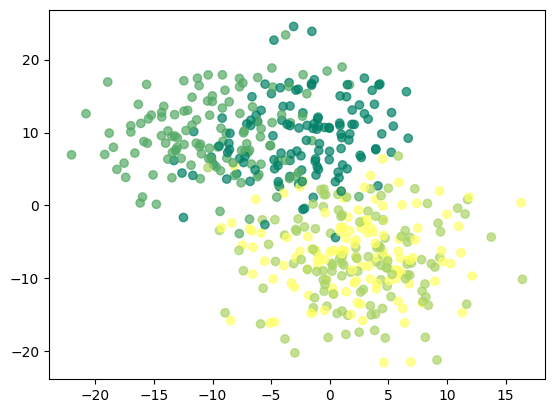

In [354]:
plt.scatter(X[:,0],X[:,1],c=y,cmap='summer',alpha=0.7)
plt.show()

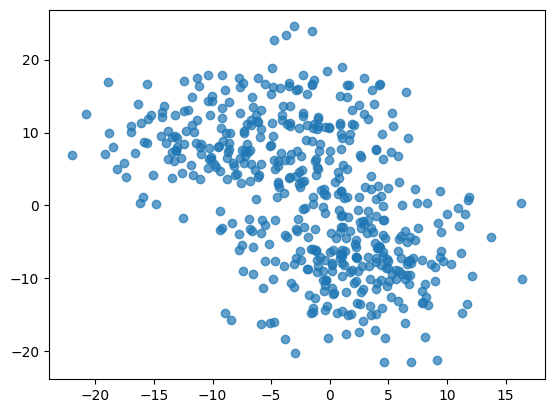

In [355]:
plt.scatter(X[:,0],X[:,1],alpha=0.7)
plt.show()

In [356]:
X.shape

(500, 10)

In [357]:
df_linear = pd.DataFrame(X) 

In [358]:
df_linear.columns = [f"vab_{col+1}" for col in df_linear.columns]

In [359]:
df_linear['target'] = y

In [360]:
df_linear

vab_1      vab_2      vab_3      vab_4     vab_5     vab_6  \
0    -5.915826   9.415179  10.238744   2.932082 -7.560789 -8.384469   
1    -1.011345  -8.364777  -7.523082  -2.183446  1.108751  2.778589   
2    -1.521256   8.884683   6.051055 -11.790977 -9.621378 -4.969239   
3    -0.511033   1.512426  -5.233148  -9.923943  3.583774 -1.965502   
4     6.641074  -7.592013  -9.231718   8.030529  3.776678  2.086960   
..         ...        ...        ...        ...       ...       ...   
495   3.934286  -1.479775   0.303991   4.110236  1.571178 -1.291063   
496  -0.415591 -10.877519  -2.811240  -1.123830 -3.145576  5.866439   
497   8.964476  -8.452273  -9.339726 -12.794640 -8.763353  0.186548   
498 -14.342360  12.762542   8.762939  -5.296737 -5.317876  2.166731   
499  -8.351839  -2.389400  -9.461241  13.004682  7.047293  6.842037   

         vab_7     vab_8     vab_9     vab_10  target  
0     3.817842  3.587400 -4.383650  -1.607136       1  
1    -8.090733 -6.473995 -0.460039  -9.216038       3  
2    -9.302836  4.211802 -4.587759  -5.983203       1  
3    -4.866862 -9.777110 -4.113496  -8.388731       2  
4    -5.886460 -4.564809  3.010796  -9.167377       3  
..         ...       ...       ...        ...     ...  
495  -7.168167  5.228464  2.771318  -7.182853       2  
496 -11.446325  5.395608  1.606887  -0.122200       2  
497   1.309891  0.903259  2.360404 -21.488913       2  
498  -5.524547  0.760455 -0.050439   7.297902       1  
499  -0.810328  6.438151  7.111254  -5.241037       3  

[500 rows x 11 columns]

In [361]:
df_linear['target'].value_counts()

target
1    125
3    125
2    125
0    125
Name: count, dtype: int64

In [362]:
# sns.pairplot(df_linear)

<Axes: ylabel='Density'>

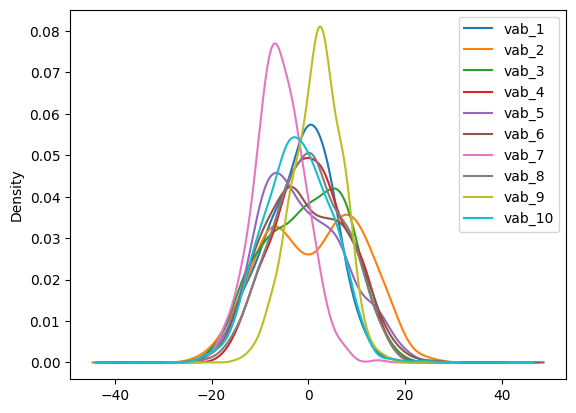

In [363]:
df_linear.iloc[:,:-1].plot(kind='density')

### correlation matrix

In [364]:
df_linear.iloc[:,:-1].corr()

vab_1     vab_2     vab_3     vab_4     vab_5     vab_6     vab_7  \
vab_1   1.000000 -0.486942 -0.447335  0.350051  0.410801  0.452514 -0.075782   
vab_2  -0.486942  1.000000  0.613055 -0.308053 -0.535676 -0.660596 -0.042907   
vab_3  -0.447335  0.613055  1.000000 -0.404254 -0.585948 -0.588399 -0.045079   
vab_4   0.350051 -0.308053 -0.404254  1.000000  0.417966  0.273300 -0.042056   
vab_5   0.410801 -0.535676 -0.585948  0.417966  1.000000  0.522756  0.058207   
vab_6   0.452514 -0.660596 -0.588399  0.273300  0.522756  1.000000  0.006910   
vab_7  -0.075782 -0.042907 -0.045079 -0.042056  0.058207  0.006910  1.000000   
vab_8  -0.211216  0.442483  0.449298 -0.252915 -0.516129 -0.388445 -0.142480   
vab_9   0.229445 -0.203147 -0.257066  0.293808  0.230401  0.217423 -0.039972   
vab_10 -0.140779  0.347897  0.224178  0.237288 -0.100335 -0.325186 -0.116193   

           vab_8     vab_9    vab_10  
vab_1  -0.211216  0.229445 -0.140779  
vab_2   0.442483 -0.203147  0.347897  
vab_3   0.449298 -0.257066  0.224178  
vab_4  -0.252915  0.293808  0.237288  
vab_5  -0.516129  0.230401 -0.100335  
vab_6  -0.388445  0.217423 -0.325186  
vab_7  -0.142480 -0.039972 -0.116193  
vab_8   1.000000 -0.095332  0.161269  
vab_9  -0.095332  1.000000  0.032065  
vab_10  0.161269  0.032065  1.000000

<Axes: >

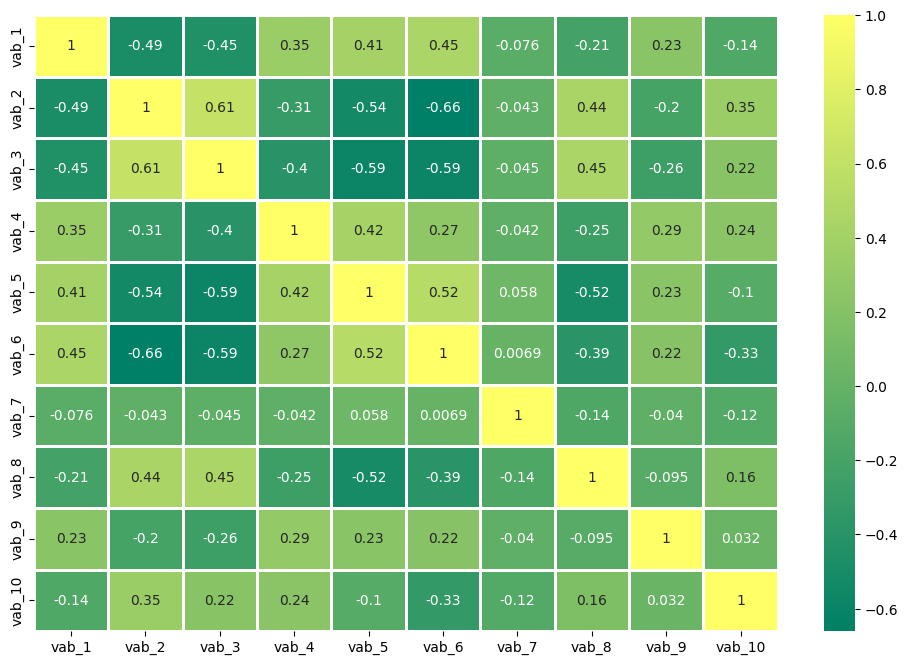

In [365]:
plt.figure(figsize=(12,8))
sns.heatmap(df_linear.iloc[:,:-1].corr(),cmap='summer',annot=True,linecolor='white',
            linewidths=1)

### data standardization

In [366]:
X_values = df_linear.iloc[:,:-1].values

In [367]:
y_values = df_linear.iloc[:,-1].values

In [368]:
from sklearn.preprocessing import StandardScaler

In [369]:
scaler = StandardScaler()

In [370]:
X_values = scaler.fit_transform(X_values)

In [371]:
np.mean(X_values),np.std(X_values)

(-1.0373923942097463e-16, 1.0)

In [372]:
pd.DataFrame(X_values)

0         1         2         3         4         5         6  \
0   -0.576590  0.834881  1.268863  0.337453 -0.744489 -0.958663  1.865415   
1    0.129787 -0.976571 -0.857178 -0.361571  0.285170  0.370419 -0.423208   
2    0.056346  0.780833  0.767608 -1.674416 -0.989220 -0.552043 -0.656153   
3    0.201845  0.029735 -0.583080 -1.419291  0.579122 -0.194416  0.196365   
4    1.231941 -0.897840 -1.061697  1.034143  0.602032  0.288074  0.000416   
..        ...       ...       ...       ...       ...       ...       ...   
495  0.842091 -0.275115  0.079701  0.498445  0.340091 -0.114117 -0.245907   
496  0.215592 -1.232573 -0.293184 -0.216777 -0.220106  0.738061 -1.068095   
497  1.566573 -0.985485 -1.074626 -1.811564 -0.887315  0.061809  1.383430   
498 -1.790237  1.175916  1.092213 -0.786994 -0.478104  0.297571  0.069969   
499 -0.927441 -0.367789 -1.089171  1.713849  0.990475  0.854217  0.975960   

            7         8         9  
0    0.469103 -1.225911  0.084795  
1   -0.887944 -0.445326 -1.022465  
2    0.553320 -1.266518 -0.552017  
3   -1.333457 -1.172165 -0.902074  
4   -0.630439  0.245180 -1.015383  
..        ...       ...       ...  
495  0.690444  0.197537 -0.726592  
496  0.712988 -0.034121  0.300886  
497  0.107075  0.115788 -2.808434  
498  0.087814 -0.363838  1.380671  
499  0.853602  1.060948 -0.444016  

[500 rows x 10 columns]

## pca application

In [373]:
from sklearn.decomposition import PCA

In [374]:
pca_general = PCA()

In [375]:
pca_general.fit(X_values)

PCA()

In [376]:
explained_variance = pca_general.explained_variance_ratio_

In [377]:
explained_variance

array([0.39005736, 0.14252111, 0.10563451, 0.08503339, 0.06946151,
       0.05063072, 0.0450599 , 0.04128391, 0.03772956, 0.03258804])

In [378]:
eigenvalues = pca_general.explained_variance_

In [379]:
pd.DataFrame(eigenvalues)

0
0  3.908390
1  1.428067
2  1.058462
3  0.852038
4  0.696007
5  0.507322
6  0.451502
7  0.413666
8  0.378052
9  0.326533

In [380]:
eigenvectors = pca_general.components_

### scree plot

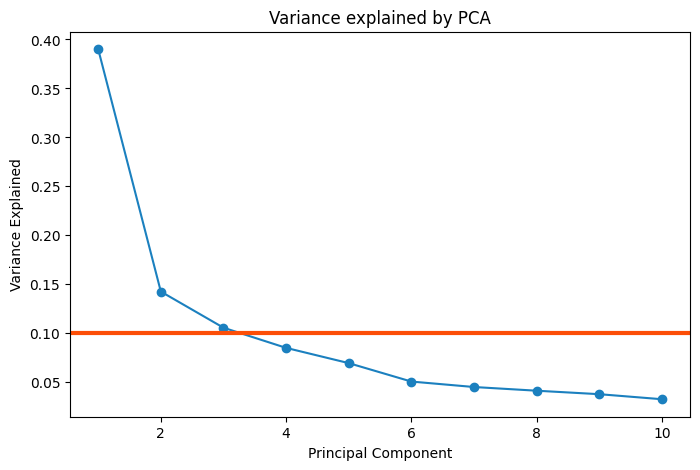

In [381]:
plt.figure(figsize=(8,5))
plt.plot(range(1, len(explained_variance) + 1), explained_variance, marker='o', linestyle='-', color='#1B80BF')
plt.axhline(y=0.1, color='#FC4E07', linewidth=3)
plt.title('Variance explained by PCA')
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained')
plt.show()

In [382]:
pca = PCA(n_components=2)

In [383]:
principal_components = pca.fit_transform(X_values)

In [384]:
pd.DataFrame(principal_components).head(8)

0         1
0  1.989103 -0.612637
1 -1.304821 -1.155632
2  2.036264 -1.229210
3 -0.403509 -1.872577
4 -2.248810 -0.115557
5 -1.989787  0.020806
6 -1.598013 -1.305250
7  1.636833 -1.410185

In [385]:
principal_df = pd.DataFrame(data = principal_components,columns = ['principal component 1','principal component 2'])

In [386]:
final_df = pd.concat([principal_df,df_linear[['target']]],axis = 1)

In [387]:
final_df

principal component 1  principal component 2  target
0                 1.989103              -0.612637       1
1                -1.304821              -1.155632       3
2                 2.036264              -1.229210       1
3                -0.403509              -1.872577       2
4                -2.248810              -0.115557       3
..                     ...                    ...     ...
495              -0.504194               0.132121       2
496              -0.548141               0.224845       2
497              -1.005734              -3.193659       2
498               2.115411               0.242176       1
499              -1.520633               0.524282       3

[500 rows x 3 columns]

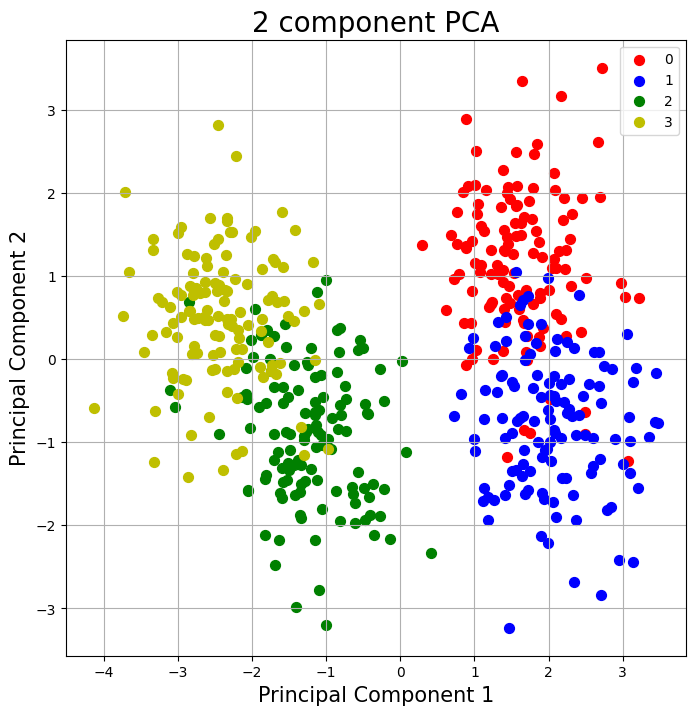

In [388]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1',fontsize = 15)
ax.set_ylabel('Principal Component 2',fontsize = 15)
ax.set_title('2 component PCA',fontsize = 20)

targets = [0,1,2,3]
colors = ['r','b','g','y']
for target, color in zip(targets,colors):
    indicesToKeep = final_df['target'] == target
    ax.scatter(final_df.loc[indicesToKeep, 'principal component 1']
               ,final_df.loc[indicesToKeep, 'principal component 2']
               ,c = color
               ,s = 50)
ax.legend(targets)
ax.grid()

### biplot

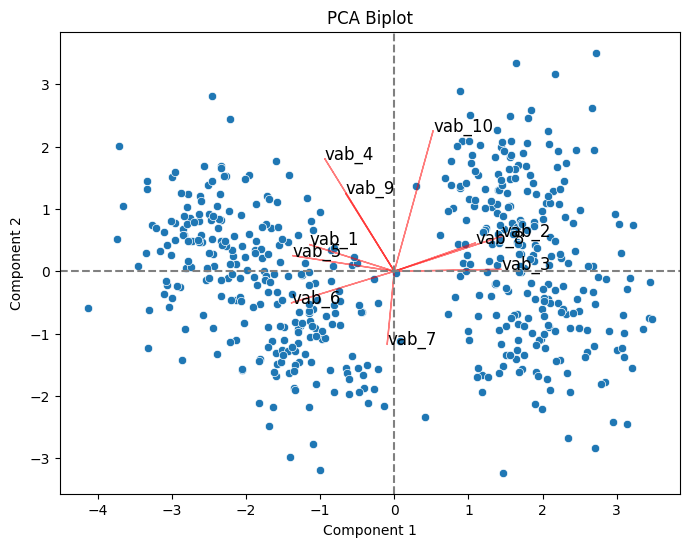

In [389]:
scores = pca.transform(X_values)
plt.figure(figsize=(8, 6))
sns.scatterplot(x=scores[:, 0], y=scores[:, 1])
for i, col in enumerate(df_linear.iloc[:,:-1].columns):
    plt.arrow(0, 0, eigenvectors[0, i] * max(scores[:, 0]), eigenvectors[1, i] * max(scores[:, 1]), color='r', alpha=0.5)
    plt.text(eigenvectors[0, i] * max(scores[:, 0]), eigenvectors[1, i] * max(scores[:, 1]), col, fontsize=12)
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.title('PCA Biplot')
plt.axhline(0, color='gray', linestyle='--')
plt.axvline(0, color='gray', linestyle='--')
plt.show()

### loading plot

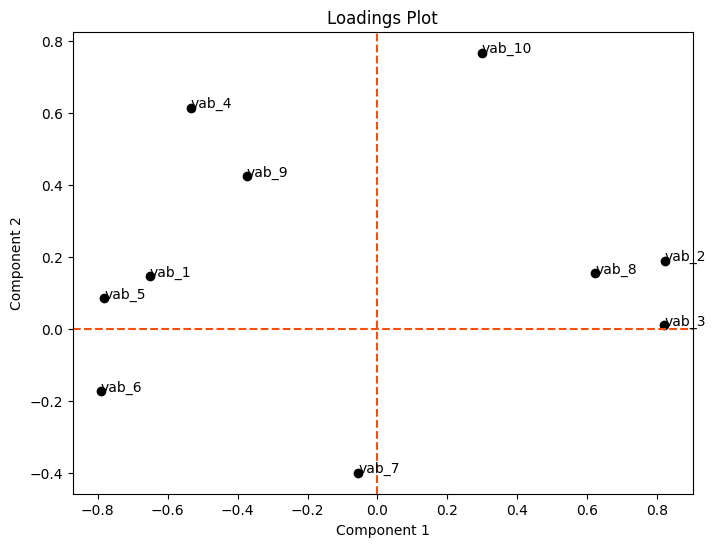

In [390]:
loadings = pca.components_.T * np.sqrt(pca.explained_variance_)
plt.figure(figsize=(8, 6))
plt.scatter(loadings[:, 0], loadings[:, 1], color='black')
for i, txt in enumerate(df_linear.iloc[:,:-1].columns):
    plt.text(loadings[i, 0], loadings[i, 1], txt, fontsize=10)
plt.axhline(0, color='#FC4E07', linestyle='--')
plt.axvline(0, color='#FC4E07', linestyle='--')
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.title('Loadings Plot')
plt.show()

### scores

In [391]:
scores_pca = pca.transform(X_values)

In [392]:
pd.DataFrame(scores_pca).head()

0         1
0  1.989103 -0.612637
1 -1.304821 -1.155632
2  2.036264 -1.229210
3 -0.403509 -1.872577
4 -2.248810 -0.115557

## t-SNE

In [393]:
from sklearn.manifold import TSNE

In [394]:
tsne = TSNE(n_components=2,random_state=42)

In [395]:
X_tsne = tsne.fit_transform(X_values)

In [396]:
tsne_data = np.vstack((X_tsne.T,df_linear['target'])).T

In [397]:
tsne_df = pd.DataFrame(data=tsne_data,columns=('dim_1','dim_2','target'))

In [398]:
tsne_df

dim_1     dim_2  target
0    22.521677 -7.862161     1.0
1   -19.921301 -0.889044     3.0
2    18.558737 -5.039337     1.0
3   -17.498144 -6.332827     2.0
4   -24.958900 -0.228695     3.0
..         ...       ...     ...
495 -16.397436  3.715633     2.0
496 -22.392952  4.661265     2.0
497 -12.371681  0.240039     2.0
498  21.446112  3.936818     1.0
499 -30.707745 -8.360952     3.0

[500 rows x 3 columns]

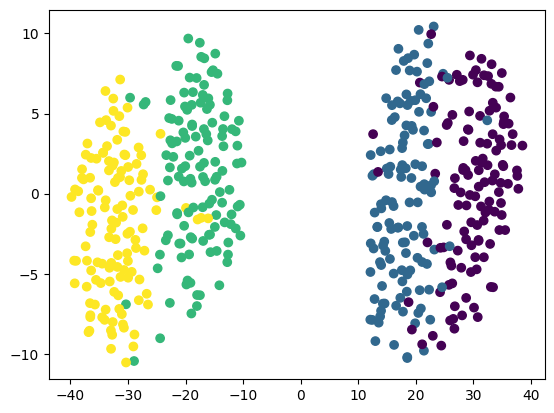

In [399]:
plt.scatter(x=tsne_df['dim_1'],y=tsne_df['dim_2'],c=tsne_df['target'])
plt.show()

In [400]:
tsne.kl_divergence_

0.9525728225708008

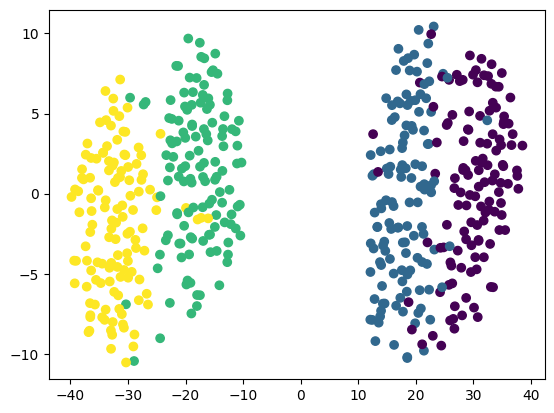

In [401]:
plt.scatter(x=X_tsne[:,0],y=X_tsne[:,1],c=y)
plt.show()

## clustering 

In [402]:
from sklearn.cluster import KMeans

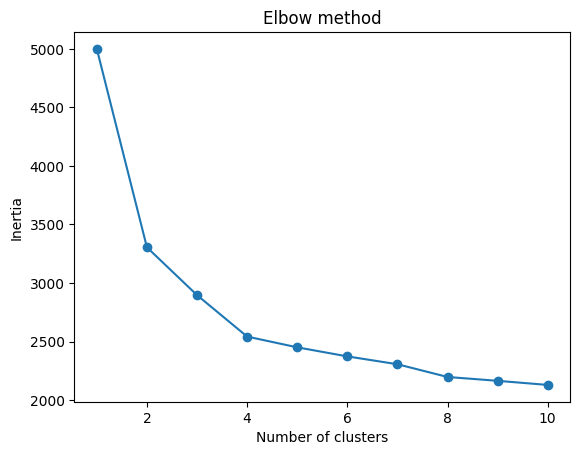

In [403]:
inertias = []

for i in range(1,11):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(X_values)
    inertias.append(kmeans.inertia_)

plt.plot(range(1,11), inertias, marker='o')
plt.title('Elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

In [404]:
kmeans = KMeans(n_clusters=4)

In [405]:
kmeans.fit(X_values)

KMeans(n_clusters=4)

In [406]:
df_linear['k_means'] = kmeans.labels_

In [407]:
df_linear

vab_1      vab_2      vab_3      vab_4     vab_5     vab_6  \
0    -5.915826   9.415179  10.238744   2.932082 -7.560789 -8.384469   
1    -1.011345  -8.364777  -7.523082  -2.183446  1.108751  2.778589   
2    -1.521256   8.884683   6.051055 -11.790977 -9.621378 -4.969239   
3    -0.511033   1.512426  -5.233148  -9.923943  3.583774 -1.965502   
4     6.641074  -7.592013  -9.231718   8.030529  3.776678  2.086960   
..         ...        ...        ...        ...       ...       ...   
495   3.934286  -1.479775   0.303991   4.110236  1.571178 -1.291063   
496  -0.415591 -10.877519  -2.811240  -1.123830 -3.145576  5.866439   
497   8.964476  -8.452273  -9.339726 -12.794640 -8.763353  0.186548   
498 -14.342360  12.762542   8.762939  -5.296737 -5.317876  2.166731   
499  -8.351839  -2.389400  -9.461241  13.004682  7.047293  6.842037   

         vab_7     vab_8     vab_9     vab_10  target  k_means  
0     3.817842  3.587400 -4.383650  -1.607136       1        1  
1    -8.090733 -6.473995 -0.460039  -9.216038       3        3  
2    -9.302836  4.211802 -4.587759  -5.983203       1        1  
3    -4.866862 -9.777110 -4.113496  -8.388731       2        3  
4    -5.886460 -4.564809  3.010796  -9.167377       3        2  
..         ...       ...       ...        ...     ...      ...  
495  -7.168167  5.228464  2.771318  -7.182853       2        0  
496 -11.446325  5.395608  1.606887  -0.122200       2        0  
497   1.309891  0.903259  2.360404 -21.488913       2        3  
498  -5.524547  0.760455 -0.050439   7.297902       1        1  
499  -0.810328  6.438151  7.111254  -5.241037       3        2  

[500 rows x 12 columns]

In [408]:
from scipy.optimize import linear_sum_assignment

y_true = df_linear['target'].values  
y_kmeans = df_linear['k_means'].values  

conf_matrix = confusion_matrix(y_true, y_kmeans)

row_ind, col_ind = linear_sum_assignment(-conf_matrix)  

mapping = {old: new for old, new in zip(col_ind, row_ind)}
df_linear['k_means'] = np.array([mapping[label] for label in y_kmeans])

print("accuracy before:", np.mean(y_kmeans == y_true))
print("accuracy after:", np.mean(df_linear['k_means'] == y_true))

accuracy before: 0.274
accuracy after: 0.602


In [409]:
df_linear

vab_1      vab_2      vab_3      vab_4     vab_5     vab_6  \
0    -5.915826   9.415179  10.238744   2.932082 -7.560789 -8.384469   
1    -1.011345  -8.364777  -7.523082  -2.183446  1.108751  2.778589   
2    -1.521256   8.884683   6.051055 -11.790977 -9.621378 -4.969239   
3    -0.511033   1.512426  -5.233148  -9.923943  3.583774 -1.965502   
4     6.641074  -7.592013  -9.231718   8.030529  3.776678  2.086960   
..         ...        ...        ...        ...       ...       ...   
495   3.934286  -1.479775   0.303991   4.110236  1.571178 -1.291063   
496  -0.415591 -10.877519  -2.811240  -1.123830 -3.145576  5.866439   
497   8.964476  -8.452273  -9.339726 -12.794640 -8.763353  0.186548   
498 -14.342360  12.762542   8.762939  -5.296737 -5.317876  2.166731   
499  -8.351839  -2.389400  -9.461241  13.004682  7.047293  6.842037   

         vab_7     vab_8     vab_9     vab_10  target  k_means  
0     3.817842  3.587400 -4.383650  -1.607136       1        0  
1    -8.090733 -6.473995 -0.460039  -9.216038       3        2  
2    -9.302836  4.211802 -4.587759  -5.983203       1        0  
3    -4.866862 -9.777110 -4.113496  -8.388731       2        2  
4    -5.886460 -4.564809  3.010796  -9.167377       3        3  
..         ...       ...       ...        ...     ...      ...  
495  -7.168167  5.228464  2.771318  -7.182853       2        1  
496 -11.446325  5.395608  1.606887  -0.122200       2        1  
497   1.309891  0.903259  2.360404 -21.488913       2        2  
498  -5.524547  0.760455 -0.050439   7.297902       1        0  
499  -0.810328  6.438151  7.111254  -5.241037       3        3  

[500 rows x 12 columns]

In [410]:
print(np.unique(df_linear['target']))

[0 1 2 3]


In [411]:
print(np.unique(kmeans.labels_))

[0 1 2 3]


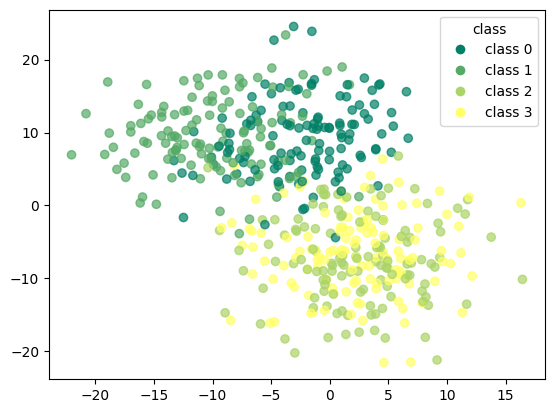

In [412]:
from matplotlib.lines import Line2D

scatter = plt.scatter(df_linear.iloc[:, 0], df_linear.iloc[:, 1], 
                      c=df_linear['target'], cmap='summer', alpha=0.7)

unique_labels = np.unique(df_linear['target'])
legend_elements = [Line2D([0], [0], marker='o', color='w', label=f'class {label}',
                          markerfacecolor=scatter.cmap(scatter.norm(label)), markersize=8) 
                   for label in unique_labels]
plt.legend(handles=legend_elements, title="class")
plt.show()

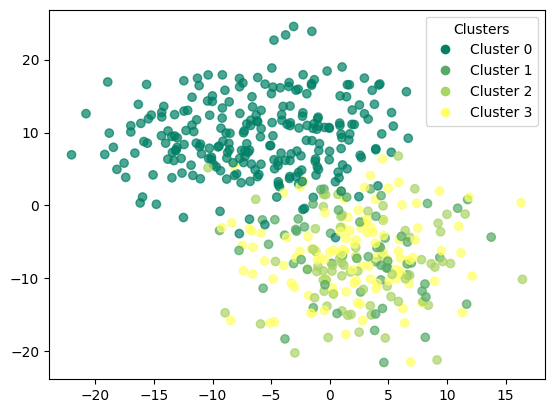

In [413]:
scatter = plt.scatter(df_linear.iloc[:, 0], df_linear.iloc[:, 1], 
                      c=df_linear['k_means'], cmap='summer', alpha=0.7)
unique_clusters = np.unique(df_linear['k_means'])
legend_elements = [Line2D([0], [0], marker='o', color='w', label=f'Cluster {cluster}',
                          markerfacecolor=scatter.cmap(scatter.norm(cluster)), markersize=8) 
                   for cluster in unique_clusters]
plt.legend(handles=legend_elements, title="Clusters")
plt.show()

In [414]:
kmeans.cluster_centers_

array([[ 0.61252015, -0.81630453, -0.43401916, -0.45915431,  0.2521893 ,
         0.85636844, -0.87998042,  0.22665094,  0.42872406, -0.99438487],
       [-0.59907025,  0.83608028,  0.75557431, -0.36507269, -0.6865835 ,
        -0.77338999, -0.05302504,  0.53880595, -0.29006075,  0.42388959],
       [ 0.54648713, -0.78130877, -1.03412339,  1.15644282,  1.27567933,
         0.75785991,  0.18842369, -1.07360251,  0.47705619,  0.2047355 ],
       [ 0.67579761, -0.94592507, -0.57082613, -0.2389216 ,  0.0782854 ,
         0.72607407,  0.65115787, -0.31526785, -0.14797621, -0.97827607]])

In [415]:
print(confusion_matrix(df_linear['target'],df_linear['k_means']))

[[125   0   0   0]
 [125   0   0   0]
 [  0  61  61   3]
 [  0   1   9 115]]


In [416]:
print(classification_report(df_linear['target'],df_linear['k_means']))

              precision    recall  f1-score   support

           0       0.50      1.00      0.67       125
           1       0.00      0.00      0.00       125
           2       0.87      0.49      0.63       125
           3       0.97      0.92      0.95       125

    accuracy                           0.60       500
   macro avg       0.59      0.60      0.56       500
weighted avg       0.59      0.60      0.56       500



### clustering with pca

In [417]:
WCSS = []

for i in range(1,30):
  kmeans_pca = KMeans(n_clusters = i, init = "k-means++", random_state = 42)
  kmeans_pca.fit(scores_pca)
  WCSS.append(kmeans_pca.inertia_)

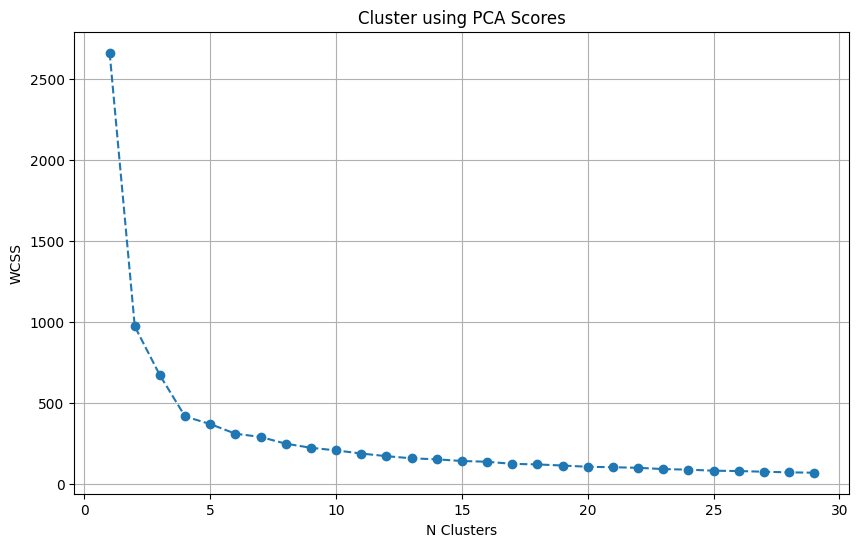

In [418]:
plt.figure(figsize = (10,6))
plt.plot(range(1,30), WCSS, marker = "o", linestyle = "--")
plt.grid()
plt.title("Cluster using PCA Scores")
plt.ylabel("WCSS")
plt.xlabel("N Clusters")
plt.show()

In [419]:
kmeans_pca = KMeans(n_clusters=4,init='k-means++')

In [420]:
kmeans_pca.fit(scores_pca)

KMeans(n_clusters=4)

In [421]:
df_pca_kmeans = df_linear.copy()

In [422]:
df_pca_kmeans["kmeans_pca"] = kmeans_pca.labels_

In [423]:
df_pca_kmeans

vab_1      vab_2      vab_3      vab_4     vab_5     vab_6  \
0    -5.915826   9.415179  10.238744   2.932082 -7.560789 -8.384469   
1    -1.011345  -8.364777  -7.523082  -2.183446  1.108751  2.778589   
2    -1.521256   8.884683   6.051055 -11.790977 -9.621378 -4.969239   
3    -0.511033   1.512426  -5.233148  -9.923943  3.583774 -1.965502   
4     6.641074  -7.592013  -9.231718   8.030529  3.776678  2.086960   
..         ...        ...        ...        ...       ...       ...   
495   3.934286  -1.479775   0.303991   4.110236  1.571178 -1.291063   
496  -0.415591 -10.877519  -2.811240  -1.123830 -3.145576  5.866439   
497   8.964476  -8.452273  -9.339726 -12.794640 -8.763353  0.186548   
498 -14.342360  12.762542   8.762939  -5.296737 -5.317876  2.166731   
499  -8.351839  -2.389400  -9.461241  13.004682  7.047293  6.842037   

         vab_7     vab_8     vab_9     vab_10  target  k_means  kmeans_pca  
0     3.817842  3.587400 -4.383650  -1.607136       1        0           1  
1    -8.090733 -6.473995 -0.460039  -9.216038       3        2           2  
2    -9.302836  4.211802 -4.587759  -5.983203       1        0           1  
3    -4.866862 -9.777110 -4.113496  -8.388731       2        2           2  
4    -5.886460 -4.564809  3.010796  -9.167377       3        3           0  
..         ...       ...       ...        ...     ...      ...         ...  
495  -7.168167  5.228464  2.771318  -7.182853       2        1           2  
496 -11.446325  5.395608  1.606887  -0.122200       2        1           2  
497   1.309891  0.903259  2.360404 -21.488913       2        2           2  
498  -5.524547  0.760455 -0.050439   7.297902       1        0           1  
499  -0.810328  6.438151  7.111254  -5.241037       3        3           0  

[500 rows x 13 columns]

In [424]:
y_true = df_pca_kmeans['target'].values  
y_kmeans = df_pca_kmeans['kmeans_pca'].values  

conf_matrix = confusion_matrix(y_true, y_kmeans)

row_ind, col_ind = linear_sum_assignment(-conf_matrix)  

mapping = {old: new for old, new in zip(col_ind, row_ind)}
df_pca_kmeans['kmeans_pca'] = np.array([mapping[label] for label in y_kmeans])

print("accuracy before:", np.mean(y_kmeans == y_true))
print("accuracy after:", np.mean(df_pca_kmeans['kmeans_pca'] == y_true))

accuracy before: 0.432
accuracy after: 0.884


In [425]:
df_pca_kmeans

vab_1      vab_2      vab_3      vab_4     vab_5     vab_6  \
0    -5.915826   9.415179  10.238744   2.932082 -7.560789 -8.384469   
1    -1.011345  -8.364777  -7.523082  -2.183446  1.108751  2.778589   
2    -1.521256   8.884683   6.051055 -11.790977 -9.621378 -4.969239   
3    -0.511033   1.512426  -5.233148  -9.923943  3.583774 -1.965502   
4     6.641074  -7.592013  -9.231718   8.030529  3.776678  2.086960   
..         ...        ...        ...        ...       ...       ...   
495   3.934286  -1.479775   0.303991   4.110236  1.571178 -1.291063   
496  -0.415591 -10.877519  -2.811240  -1.123830 -3.145576  5.866439   
497   8.964476  -8.452273  -9.339726 -12.794640 -8.763353  0.186548   
498 -14.342360  12.762542   8.762939  -5.296737 -5.317876  2.166731   
499  -8.351839  -2.389400  -9.461241  13.004682  7.047293  6.842037   

         vab_7     vab_8     vab_9     vab_10  target  k_means  kmeans_pca  
0     3.817842  3.587400 -4.383650  -1.607136       1        0           1  
1    -8.090733 -6.473995 -0.460039  -9.216038       3        2           2  
2    -9.302836  4.211802 -4.587759  -5.983203       1        0           1  
3    -4.866862 -9.777110 -4.113496  -8.388731       2        2           2  
4    -5.886460 -4.564809  3.010796  -9.167377       3        3           3  
..         ...       ...       ...        ...     ...      ...         ...  
495  -7.168167  5.228464  2.771318  -7.182853       2        1           2  
496 -11.446325  5.395608  1.606887  -0.122200       2        1           2  
497   1.309891  0.903259  2.360404 -21.488913       2        2           2  
498  -5.524547  0.760455 -0.050439   7.297902       1        0           1  
499  -0.810328  6.438151  7.111254  -5.241037       3        3           3  

[500 rows x 13 columns]

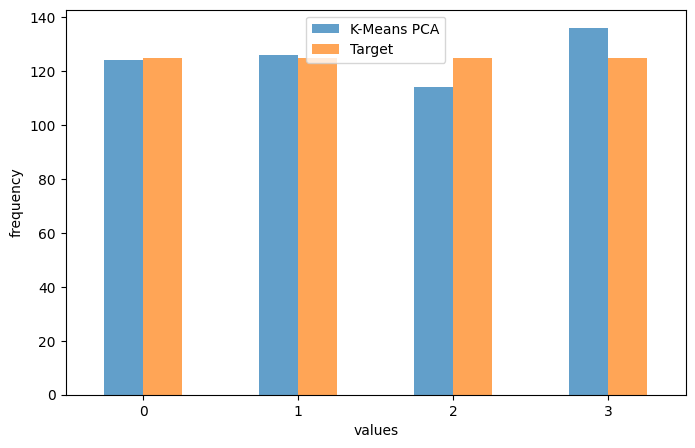

In [426]:
counts_kmeans = df_pca_kmeans['kmeans_pca'].value_counts().sort_index()
counts_target = df_pca_kmeans['target'].value_counts().sort_index()

df_counts = pd.DataFrame({'K-Means PCA': counts_kmeans, 'Target': counts_target}).fillna(0)

df_counts.plot(kind='bar', figsize=(8, 5), alpha=0.7)
plt.xlabel("values")
plt.ylabel("frequency")
plt.legend(["K-Means PCA", "Target"])
plt.xticks(rotation=0)  
plt.show()


In [427]:
print(confusion_matrix(df_pca_kmeans['target'],df_pca_kmeans['kmeans_pca']))

[[109  16   0   0]
 [ 15 110   0   0]
 [  0   0 106  19]
 [  0   0   8 117]]


In [428]:
print(classification_report(df_pca_kmeans['target'],df_pca_kmeans['kmeans_pca']))

              precision    recall  f1-score   support

           0       0.88      0.87      0.88       125
           1       0.87      0.88      0.88       125
           2       0.93      0.85      0.89       125
           3       0.86      0.94      0.90       125

    accuracy                           0.88       500
   macro avg       0.89      0.88      0.88       500
weighted avg       0.89      0.88      0.88       500



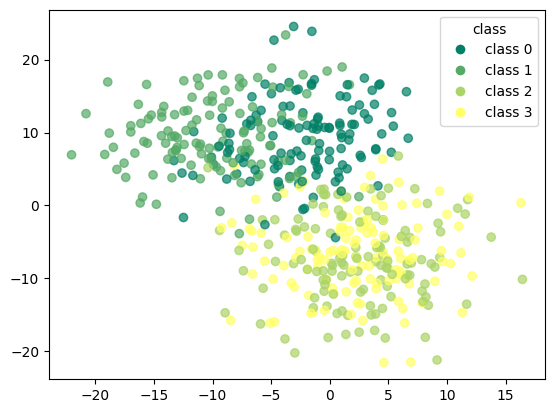

In [429]:
from matplotlib.lines import Line2D

scatter = plt.scatter(df_pca_kmeans.iloc[:, 0], df_pca_kmeans.iloc[:, 1], 
                      c=df_pca_kmeans['target'], cmap='summer', alpha=0.7)

unique_labels = np.unique(df_pca_kmeans['target'])
legend_elements = [Line2D([0], [0], marker='o', color='w', label=f'class {label}',
                          markerfacecolor=scatter.cmap(scatter.norm(label)), markersize=8) 
                   for label in unique_labels]
plt.legend(handles=legend_elements, title="class")
plt.show()

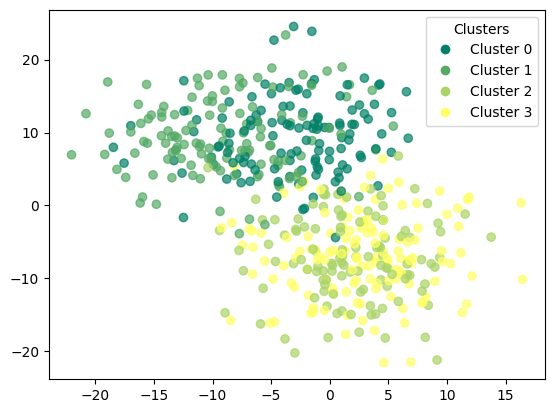

In [430]:
scatter = plt.scatter(df_pca_kmeans.iloc[:, 0], df_pca_kmeans.iloc[:, 1], 
                      c=df_pca_kmeans['kmeans_pca'], cmap='summer', alpha=0.7)
unique_clusters = np.unique(df_pca_kmeans['kmeans_pca'])
legend_elements = [Line2D([0], [0], marker='o', color='w', label=f'Cluster {cluster}',
                          markerfacecolor=scatter.cmap(scatter.norm(cluster)), markersize=8) 
                   for cluster in unique_clusters]
plt.legend(handles=legend_elements, title="Clusters")
plt.show()

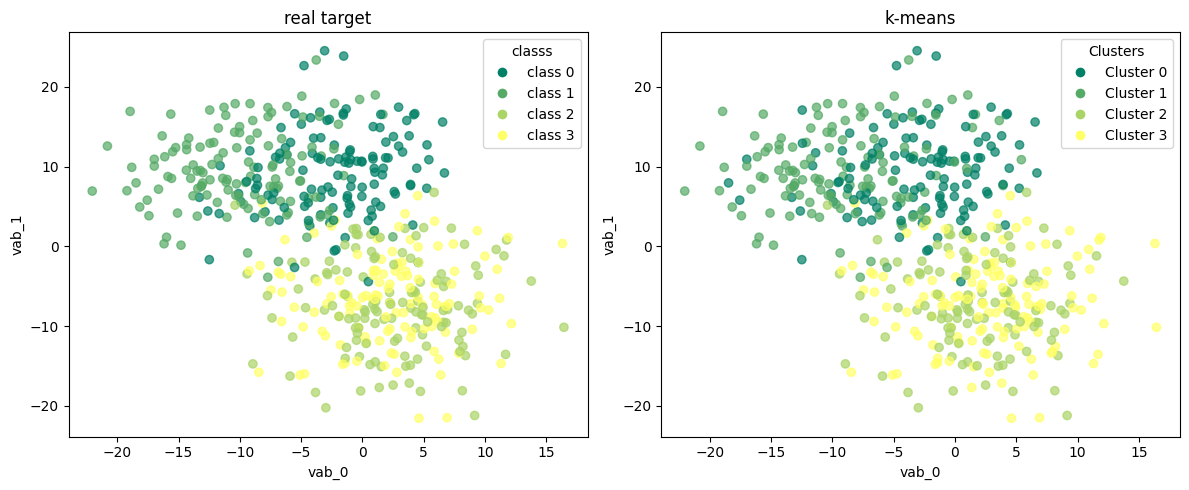

In [431]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))  

scatter1 = axes[0].scatter(df_pca_kmeans.iloc[:, 0], df_pca_kmeans.iloc[:, 1], 
                           c=df_pca_kmeans['target'], cmap='summer', alpha=0.7)

unique_labels = np.unique(df_pca_kmeans['target'])
legend_elements1 = [Line2D([0], [0], marker='o', color='w', label=f'class {label}',
                           markerfacecolor=scatter1.cmap(scatter1.norm(label)), markersize=8) 
                    for label in unique_labels]
axes[0].legend(handles=legend_elements1, title="classs")
axes[0].set_title("real target")

scatter2 = axes[1].scatter(df_pca_kmeans.iloc[:, 0], df_pca_kmeans.iloc[:, 1], 
                           c=df_pca_kmeans['kmeans_pca'], cmap='summer', alpha=0.7)

unique_clusters = np.unique(df_pca_kmeans['kmeans_pca'])
legend_elements2 = [Line2D([0], [0], marker='o', color='w', label=f'Cluster {cluster}',
                           markerfacecolor=scatter2.cmap(scatter2.norm(cluster)), markersize=8) 
                    for cluster in unique_clusters]
axes[1].legend(handles=legend_elements2, title="Clusters")
axes[1].set_title("k-means")

for ax in axes:
    ax.set_xlabel("vab_0")
    ax.set_ylabel("vab_1")

plt.tight_layout()  
plt.show()

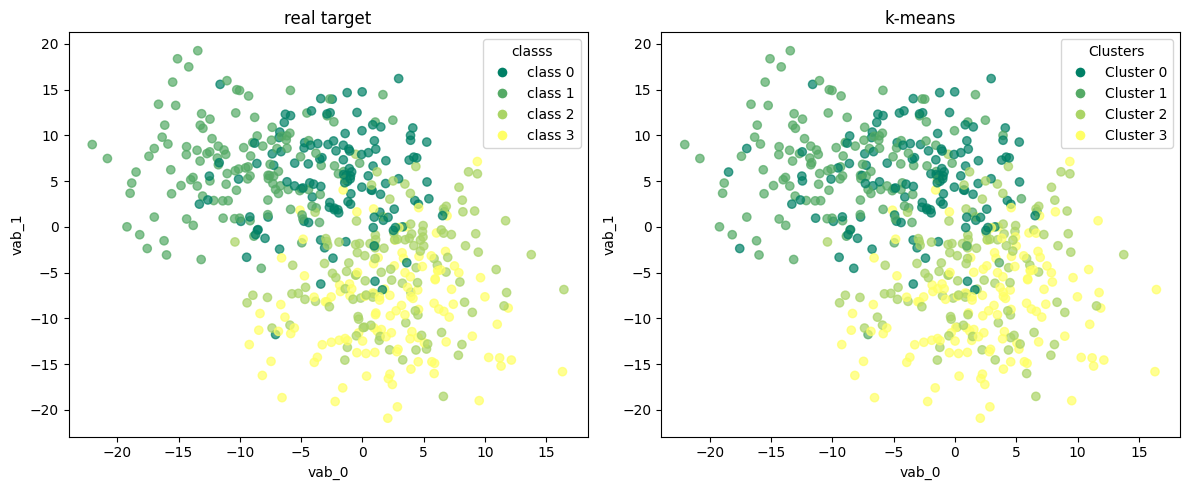

In [432]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))  

scatter1 = axes[0].scatter(df_pca_kmeans.iloc[:, 0], df_pca_kmeans.iloc[:, 2], 
                           c=df_pca_kmeans['target'], cmap='summer', alpha=0.7)

unique_labels = np.unique(df_pca_kmeans['target'])
legend_elements1 = [Line2D([0], [0], marker='o', color='w', label=f'class {label}',
                           markerfacecolor=scatter1.cmap(scatter1.norm(label)), markersize=8) 
                    for label in unique_labels]
axes[0].legend(handles=legend_elements1, title="classs")
axes[0].set_title("real target")

scatter2 = axes[1].scatter(df_pca_kmeans.iloc[:, 0], df_pca_kmeans.iloc[:, 2], 
                           c=df_pca_kmeans['kmeans_pca'], cmap='summer', alpha=0.7)

unique_clusters = np.unique(df_pca_kmeans['kmeans_pca'])
legend_elements2 = [Line2D([0], [0], marker='o', color='w', label=f'Cluster {cluster}',
                           markerfacecolor=scatter2.cmap(scatter2.norm(cluster)), markersize=8) 
                    for cluster in unique_clusters]
axes[1].legend(handles=legend_elements2, title="Clusters")
axes[1].set_title("k-means")

for ax in axes:
    ax.set_xlabel("vab_0")
    ax.set_ylabel("vab_1")

plt.tight_layout()  
plt.show()

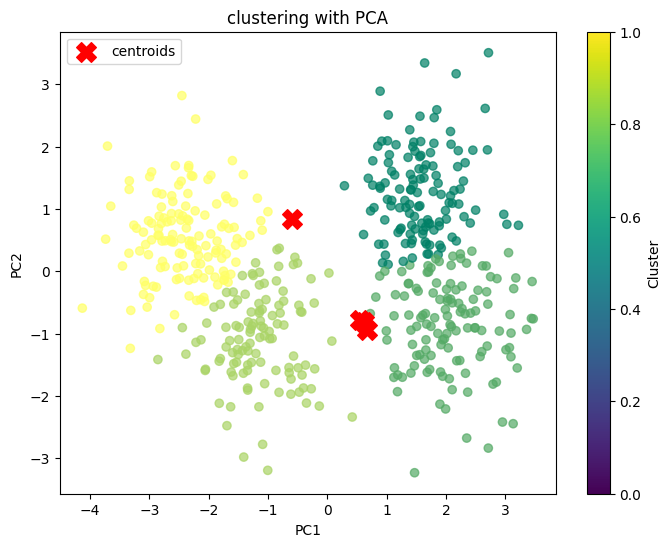

In [433]:
plt.figure(figsize=(8, 6))
plt.scatter(final_df['principal component 1'], final_df['principal component 2'] , c=df_pca_kmeans['kmeans_pca'], cmap='summer', alpha=0.7)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], 
            c='red', marker='X', s=200, label='centroids')

plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('clustering with PCA')
plt.colorbar(label='Cluster')
plt.legend()
plt.show()

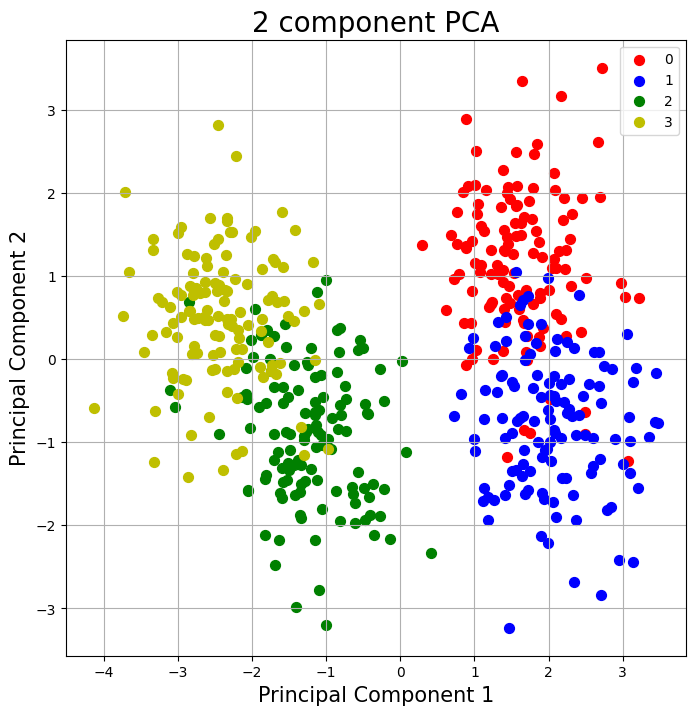

In [434]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1',fontsize = 15)
ax.set_ylabel('Principal Component 2',fontsize = 15)
ax.set_title('2 component PCA',fontsize = 20)

targets = [0,1,2,3]
colors = ['r','b','g','y']
for target, color in zip(targets,colors):
    indicesToKeep = final_df['target'] == target
    ax.scatter(final_df.loc[indicesToKeep, 'principal component 1']
               ,final_df.loc[indicesToKeep, 'principal component 2']
               ,c = color
               ,s = 50)
ax.legend(targets)
ax.grid()

### clustering with t-SNE

In [435]:
kmeans_tsne = KMeans(n_clusters=4,init='k-means++')

In [436]:
kmeans_tsne.fit(X_tsne)

KMeans(n_clusters=4)

In [437]:
df_tsne_kmeans = df_linear.copy()

In [438]:
df_tsne_kmeans['kmeans_tsne'] = kmeans_tsne.labels_

In [439]:
df_tsne_kmeans

vab_1      vab_2      vab_3      vab_4     vab_5     vab_6  \
0    -5.915826   9.415179  10.238744   2.932082 -7.560789 -8.384469   
1    -1.011345  -8.364777  -7.523082  -2.183446  1.108751  2.778589   
2    -1.521256   8.884683   6.051055 -11.790977 -9.621378 -4.969239   
3    -0.511033   1.512426  -5.233148  -9.923943  3.583774 -1.965502   
4     6.641074  -7.592013  -9.231718   8.030529  3.776678  2.086960   
..         ...        ...        ...        ...       ...       ...   
495   3.934286  -1.479775   0.303991   4.110236  1.571178 -1.291063   
496  -0.415591 -10.877519  -2.811240  -1.123830 -3.145576  5.866439   
497   8.964476  -8.452273  -9.339726 -12.794640 -8.763353  0.186548   
498 -14.342360  12.762542   8.762939  -5.296737 -5.317876  2.166731   
499  -8.351839  -2.389400  -9.461241  13.004682  7.047293  6.842037   

         vab_7     vab_8     vab_9     vab_10  target  k_means  kmeans_tsne  
0     3.817842  3.587400 -4.383650  -1.607136       1        0            0  
1    -8.090733 -6.473995 -0.460039  -9.216038       3        2            3  
2    -9.302836  4.211802 -4.587759  -5.983203       1        0            0  
3    -4.866862 -9.777110 -4.113496  -8.388731       2        2            3  
4    -5.886460 -4.564809  3.010796  -9.167377       3        3            1  
..         ...       ...       ...        ...     ...      ...          ...  
495  -7.168167  5.228464  2.771318  -7.182853       2        1            3  
496 -11.446325  5.395608  1.606887  -0.122200       2        1            3  
497   1.309891  0.903259  2.360404 -21.488913       2        2            3  
498  -5.524547  0.760455 -0.050439   7.297902       1        0            0  
499  -0.810328  6.438151  7.111254  -5.241037       3        3            1  

[500 rows x 13 columns]

In [440]:
y_true = df_tsne_kmeans['target'].values  
y_kmeans = df_tsne_kmeans['kmeans_tsne'].values  

conf_matrix = confusion_matrix(y_true, y_kmeans)

row_ind, col_ind = linear_sum_assignment(-conf_matrix)  

mapping = {old: new for old, new in zip(col_ind, row_ind)}
df_tsne_kmeans['kmeans_tsne'] = np.array([mapping[label] for label in y_kmeans])

print("accuracy before:", np.mean(y_kmeans == y_true))
print("accuracy after:", np.mean(df_tsne_kmeans['kmeans_tsne'] == y_true))

accuracy before: 0.042
accuracy after: 0.934


In [441]:
df_tsne_kmeans

vab_1      vab_2      vab_3      vab_4     vab_5     vab_6  \
0    -5.915826   9.415179  10.238744   2.932082 -7.560789 -8.384469   
1    -1.011345  -8.364777  -7.523082  -2.183446  1.108751  2.778589   
2    -1.521256   8.884683   6.051055 -11.790977 -9.621378 -4.969239   
3    -0.511033   1.512426  -5.233148  -9.923943  3.583774 -1.965502   
4     6.641074  -7.592013  -9.231718   8.030529  3.776678  2.086960   
..         ...        ...        ...        ...       ...       ...   
495   3.934286  -1.479775   0.303991   4.110236  1.571178 -1.291063   
496  -0.415591 -10.877519  -2.811240  -1.123830 -3.145576  5.866439   
497   8.964476  -8.452273  -9.339726 -12.794640 -8.763353  0.186548   
498 -14.342360  12.762542   8.762939  -5.296737 -5.317876  2.166731   
499  -8.351839  -2.389400  -9.461241  13.004682  7.047293  6.842037   

         vab_7     vab_8     vab_9     vab_10  target  k_means  kmeans_tsne  
0     3.817842  3.587400 -4.383650  -1.607136       1        0            1  
1    -8.090733 -6.473995 -0.460039  -9.216038       3        2            2  
2    -9.302836  4.211802 -4.587759  -5.983203       1        0            1  
3    -4.866862 -9.777110 -4.113496  -8.388731       2        2            2  
4    -5.886460 -4.564809  3.010796  -9.167377       3        3            3  
..         ...       ...       ...        ...     ...      ...          ...  
495  -7.168167  5.228464  2.771318  -7.182853       2        1            2  
496 -11.446325  5.395608  1.606887  -0.122200       2        1            2  
497   1.309891  0.903259  2.360404 -21.488913       2        2            2  
498  -5.524547  0.760455 -0.050439   7.297902       1        0            1  
499  -0.810328  6.438151  7.111254  -5.241037       3        3            3  

[500 rows x 13 columns]

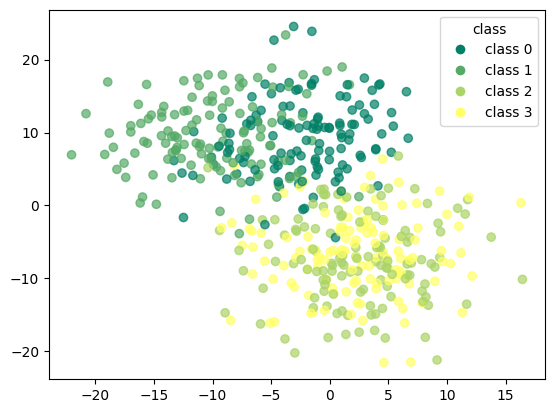

In [442]:
from matplotlib.lines import Line2D

scatter = plt.scatter(df_tsne_kmeans.iloc[:, 0], df_tsne_kmeans.iloc[:, 1], 
                      c=df_tsne_kmeans['target'], cmap='summer', alpha=0.7)

unique_labels = np.unique(df_tsne_kmeans['target'])
legend_elements = [Line2D([0], [0], marker='o', color='w', label=f'class {label}',
                          markerfacecolor=scatter.cmap(scatter.norm(label)), markersize=8) 
                   for label in unique_labels]
plt.legend(handles=legend_elements, title="class")
plt.show()

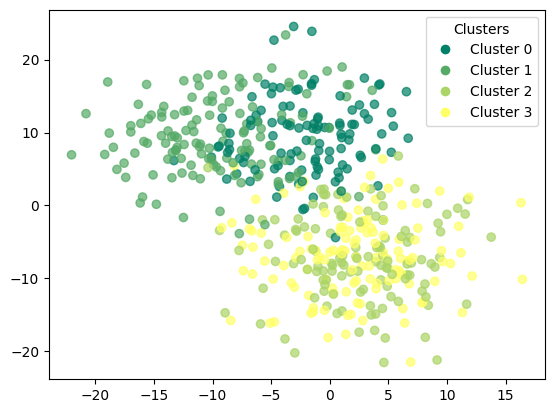

In [443]:
scatter = plt.scatter(df_tsne_kmeans.iloc[:, 0], df_tsne_kmeans.iloc[:, 1], 
                      c=df_tsne_kmeans['kmeans_tsne'], cmap='summer', alpha=0.7)
unique_clusters = np.unique(df_tsne_kmeans['kmeans_tsne'])
legend_elements = [Line2D([0], [0], marker='o', color='w', label=f'Cluster {cluster}',
                          markerfacecolor=scatter.cmap(scatter.norm(cluster)), markersize=8) 
                   for cluster in unique_clusters]
plt.legend(handles=legend_elements, title="Clusters")
plt.show()

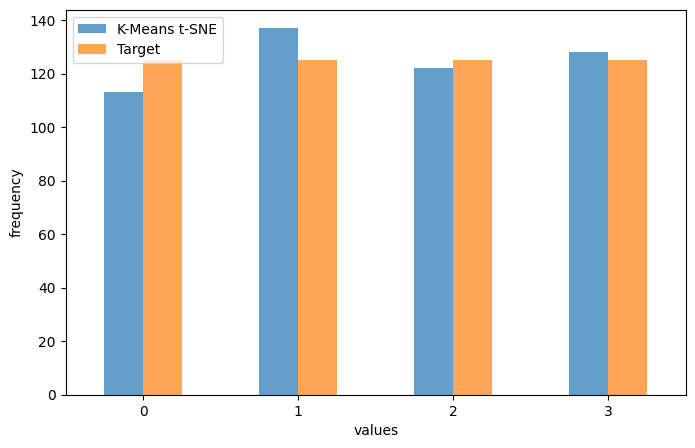

In [444]:
counts_kmeans = df_tsne_kmeans['kmeans_tsne'].value_counts().sort_index()
counts_target = df_tsne_kmeans['target'].value_counts().sort_index()

df_counts = pd.DataFrame({'K-Means t-SNE': counts_kmeans, 'Target': counts_target}).fillna(0)

df_counts.plot(kind='bar', figsize=(8, 5), alpha=0.7)
plt.xlabel("values")
plt.ylabel("frequency")
plt.legend(["K-Means t-SNE", "Target"])
plt.xticks(rotation=0)  
plt.show()

In [445]:
print(confusion_matrix(df_tsne_kmeans['target'],df_tsne_kmeans['kmeans_tsne']))

[[109  16   0   0]
 [  4 121   0   0]
 [  0   0 117   8]
 [  0   0   5 120]]


In [ ]:
print(classification_report(df_tsne_kmeans['target'],df_tsne_kmeans['kmeans_tsne'])) 

              precision    recall  f1-score   support

           0       0.96      0.87      0.92       125
           1       0.88      0.97      0.92       125
           2       0.96      0.94      0.95       125
           3       0.94      0.96      0.95       125

    accuracy                           0.93       500
   macro avg       0.94      0.93      0.93       500
weighted avg       0.94      0.93      0.93       500



In [448]:
print(classification_report(df_pca_kmeans['target'],df_pca_kmeans['kmeans_pca']))

              precision    recall  f1-score   support

           0       0.88      0.87      0.88       125
           1       0.87      0.88      0.88       125
           2       0.93      0.85      0.89       125
           3       0.86      0.94      0.90       125

    accuracy                           0.88       500
   macro avg       0.89      0.88      0.88       500
weighted avg       0.89      0.88      0.88       500



In [447]:
print(classification_report(df_linear['target'],df_linear['k_means']))

              precision    recall  f1-score   support

           0       0.50      1.00      0.67       125
           1       0.00      0.00      0.00       125
           2       0.87      0.49      0.63       125
           3       0.97      0.92      0.95       125

    accuracy                           0.60       500
   macro avg       0.59      0.60      0.56       500
weighted avg       0.59      0.60      0.56       500



t-sne with kmeans perform better than pca with kmeans

# non linear dataset - moons

In [449]:
X,y = make_moons(n_samples=500,noise=0.3, random_state=42)

num_extra_features = 8
extra_features = np.random.normal(scale=0.3,size=(X.shape[0],num_extra_features))  
X_extended = np.hstack((X,extra_features))

df_moons = pd.DataFrame(X_extended,columns=[f"vab_{i+1}" for i in range(X_extended.shape[1])])
df_moons["target"] = y

In [450]:
df_moons

vab_1     vab_2     vab_3     vab_4     vab_5     vab_6     vab_7  \
0    0.831039 -0.258749 -0.037286 -0.063415  0.223983  0.097673  0.682748   
1    1.185064  0.920387 -0.260786 -0.003260  0.041206  0.875452 -0.055244   
2    1.164022 -0.455526 -0.027587  0.004808  0.238380  0.292087 -0.151071   
3   -0.023656  1.086288  0.092968 -0.382076 -0.124388 -0.298552  0.164905   
4    0.480503  1.509424 -0.037466  0.004709  0.065598 -0.133896 -0.060192   
..        ...       ...       ...       ...       ...       ...       ...   
495  0.282035  1.048354  0.227695  0.134424  0.459714  0.126161  0.554433   
496  0.274530 -0.142661  0.004286  0.273283  0.483893  0.218771 -0.024952   
497  0.182398  0.029661  0.204490  0.004233  0.181654  0.019322  0.171284   
498  1.260173 -0.589217  0.366165  0.604066  0.073230  0.082173 -0.456952   
499 -0.026649  1.583960 -0.183300  0.238902 -0.000487 -0.053150  0.074668   

        vab_8     vab_9    vab_10  target  
0   -0.255667  0.155431 -0.158760       1  
1   -0.339054  0.081903 -0.622392       0  
2   -0.045184 -0.229836 -0.338419       1  
3    0.540429 -0.390476 -0.555906       0  
4    0.110253  0.312129 -0.586515       0  
..        ...       ...       ...     ...  
495  0.162005  0.318650 -0.097054       0  
496  0.413201 -0.657594 -0.426670       1  
497 -0.244321  0.171146  0.298324       1  
498 -0.159423 -0.057925  0.315096       1  
499 -0.117347 -0.128711 -0.511436       0  

[500 rows x 11 columns]

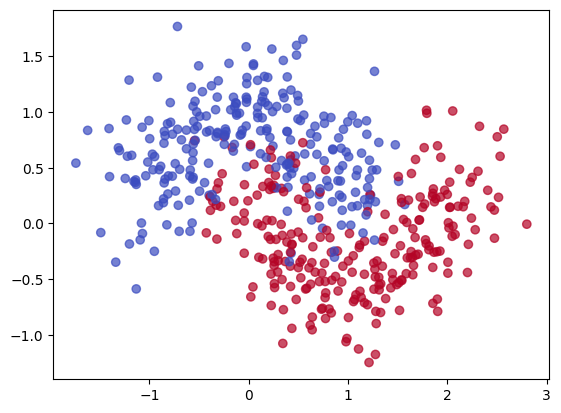

In [451]:
plt.scatter(df_moons.iloc[:,0],df_moons.iloc[:, 1],c=y,cmap='coolwarm',alpha=0.7)
plt.show()

In [452]:
df_moons

vab_1     vab_2     vab_3     vab_4     vab_5     vab_6     vab_7  \
0    0.831039 -0.258749 -0.037286 -0.063415  0.223983  0.097673  0.682748   
1    1.185064  0.920387 -0.260786 -0.003260  0.041206  0.875452 -0.055244   
2    1.164022 -0.455526 -0.027587  0.004808  0.238380  0.292087 -0.151071   
3   -0.023656  1.086288  0.092968 -0.382076 -0.124388 -0.298552  0.164905   
4    0.480503  1.509424 -0.037466  0.004709  0.065598 -0.133896 -0.060192   
..        ...       ...       ...       ...       ...       ...       ...   
495  0.282035  1.048354  0.227695  0.134424  0.459714  0.126161  0.554433   
496  0.274530 -0.142661  0.004286  0.273283  0.483893  0.218771 -0.024952   
497  0.182398  0.029661  0.204490  0.004233  0.181654  0.019322  0.171284   
498  1.260173 -0.589217  0.366165  0.604066  0.073230  0.082173 -0.456952   
499 -0.026649  1.583960 -0.183300  0.238902 -0.000487 -0.053150  0.074668   

        vab_8     vab_9    vab_10  target  
0   -0.255667  0.155431 -0.158760       1  
1   -0.339054  0.081903 -0.622392       0  
2   -0.045184 -0.229836 -0.338419       1  
3    0.540429 -0.390476 -0.555906       0  
4    0.110253  0.312129 -0.586515       0  
..        ...       ...       ...     ...  
495  0.162005  0.318650 -0.097054       0  
496  0.413201 -0.657594 -0.426670       1  
497 -0.244321  0.171146  0.298324       1  
498 -0.159423 -0.057925  0.315096       1  
499 -0.117347 -0.128711 -0.511436       0  

[500 rows x 11 columns]

### correlation matrix

In [453]:
df_moons.iloc[:,:-1].corr()

vab_1     vab_2     vab_3     vab_4     vab_5     vab_6     vab_7  \
vab_1   1.000000 -0.357584  0.016965 -0.018195 -0.054506 -0.065358 -0.018202   
vab_2  -0.357584  1.000000 -0.101874 -0.011945  0.028006  0.071077 -0.022357   
vab_3   0.016965 -0.101874  1.000000 -0.048151 -0.131912  0.056888 -0.011474   
vab_4  -0.018195 -0.011945 -0.048151  1.000000 -0.030532  0.084449 -0.072837   
vab_5  -0.054506  0.028006 -0.131912 -0.030532  1.000000 -0.016351  0.013361   
vab_6  -0.065358  0.071077  0.056888  0.084449 -0.016351  1.000000  0.086304   
vab_7  -0.018202 -0.022357 -0.011474 -0.072837  0.013361  0.086304  1.000000   
vab_8   0.040866  0.000007 -0.042220 -0.018559  0.034160  0.016796 -0.029484   
vab_9  -0.036548  0.033363 -0.050729  0.018720  0.033861 -0.072643 -0.004287   
vab_10  0.037072 -0.072402  0.026991  0.020948 -0.042969  0.034792  0.051554   

           vab_8     vab_9    vab_10  
vab_1   0.040866 -0.036548  0.037072  
vab_2   0.000007  0.033363 -0.072402  
vab_3  -0.042220 -0.050729  0.026991  
vab_4  -0.018559  0.018720  0.020948  
vab_5   0.034160  0.033861 -0.042969  
vab_6   0.016796 -0.072643  0.034792  
vab_7  -0.029484 -0.004287  0.051554  
vab_8   1.000000  0.014561  0.034759  
vab_9   0.014561  1.000000 -0.034958  
vab_10  0.034759 -0.034958  1.000000

<Axes: >

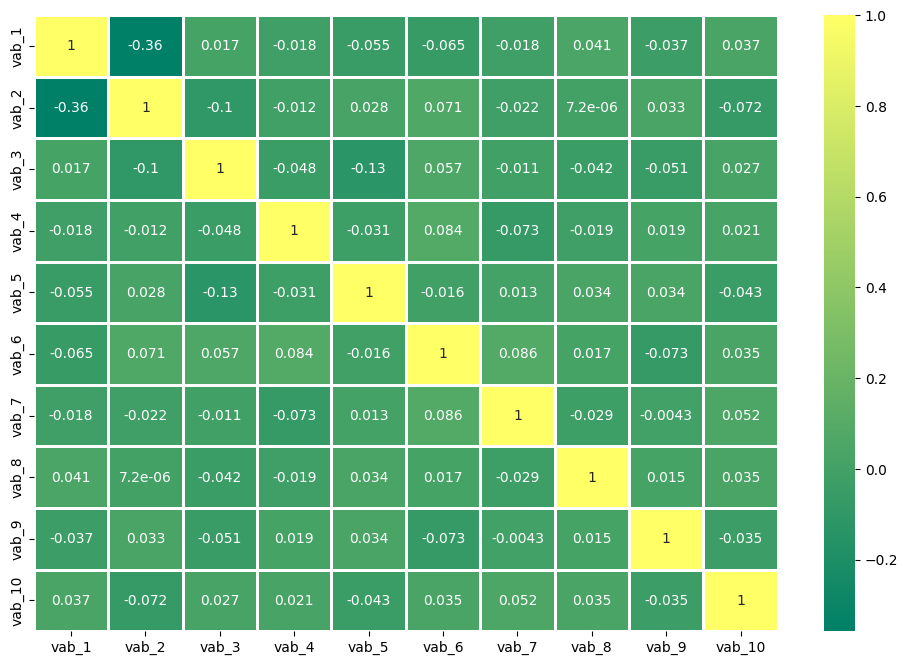

In [454]:
plt.figure(figsize=(12,8))
sns.heatmap(df_moons.iloc[:,:-1].corr(),cmap='summer',annot=True,linecolor='white',linewidths=1)

### data standardization

In [455]:
X_values = df_moons.iloc[:,:-1].values

In [456]:
y_values = df_moons.iloc[:,-1].values

In [457]:
from sklearn.preprocessing import StandardScaler

In [458]:
scaler = StandardScaler()

In [459]:
X_values = scaler.fit_transform(X_values)

In [460]:
np.mean(X_values),np.std(X_values)

(-6.252776074688882e-17, 1.0)

In [461]:
pd.DataFrame(X_values)

0         1         2         3         4         5         6  \
0    0.327883 -0.868825 -0.136686 -0.239905  0.685974  0.341428  2.204705   
1    0.709945  1.113499 -0.885645 -0.038681  0.111847  2.857319 -0.174911   
2    0.687237 -1.199639 -0.104185 -0.011694  0.731196  0.970299 -0.483900   
3   -0.594500  1.392407  0.299801 -1.305851 -0.408303 -0.940248  0.534948   
4   -0.050414  2.103769 -0.137290 -0.012023  0.188466 -0.407633 -0.190865   
..        ...       ...       ...       ...       ...       ...       ...   
495 -0.264600  1.328634  0.751274  0.421882  1.426433  0.433577  1.790960   
496 -0.272699 -0.673661  0.002623  0.886379  1.502384  0.733144 -0.077235   
497 -0.372128 -0.383959  0.673515 -0.013618  0.553013  0.087985  0.555516   
498  0.791003 -1.424397  1.215294  1.992876  0.212438  0.291290 -1.470198   
499 -0.597731  2.229076 -0.625987  0.771371 -0.019113 -0.146444  0.243984   

            7         8         9  
0   -0.838943  0.536507 -0.470192  
1   -1.103780  0.301056 -2.076489  
2   -0.170441 -0.697207 -1.092636  
3    1.689485 -1.211614 -1.846141  
4    0.323233  1.038293 -1.952189  
..        ...       ...       ...  
495  0.487599  1.059175 -0.256406  
496  1.285403 -2.066986 -1.398393  
497 -0.802906  0.586831  1.113423  
498 -0.533269 -0.146706  1.171529  
499 -0.399632 -0.373381 -1.692071  

[500 rows x 10 columns]

## pca application

In [462]:
from sklearn.decomposition import PCA

In [463]:
pca_general = PCA()

In [464]:
pca_general.fit(X_values)

PCA()

In [465]:
explained_variance = pca_general.explained_variance_ratio_

In [466]:
explained_variance

array([0.14355033, 0.12077088, 0.10924988, 0.10771235, 0.09993599,
       0.09798326, 0.09328   , 0.08790844, 0.07801031, 0.06159856])

In [467]:
eigenvalues = pca_general.explained_variance_

In [468]:
pd.DataFrame(eigenvalues)

0
0  1.438380
1  1.210129
2  1.094688
3  1.079282
4  1.001363
5  0.981796
6  0.934669
7  0.880846
8  0.781666
9  0.617220

In [469]:
eigenvectors = pca_general.components_

### scree plot

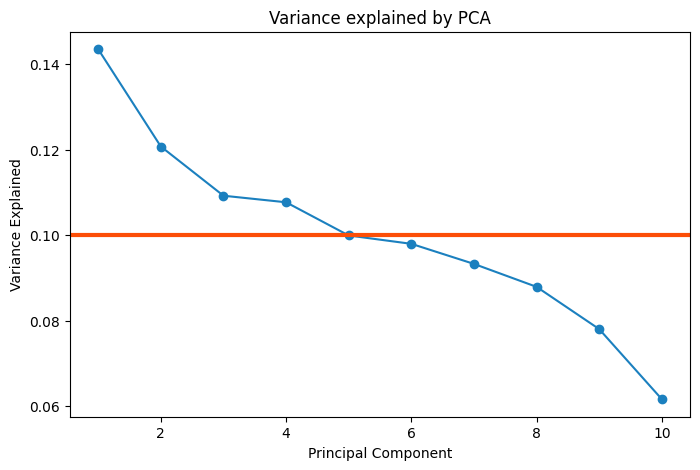

In [470]:
plt.figure(figsize=(8,5))
plt.plot(range(1, len(explained_variance) + 1), explained_variance, marker='o', linestyle='-', color='#1B80BF')
plt.axhline(y=0.1, color='#FC4E07', linewidth=3)
plt.title('Variance explained by PCA')
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained')
plt.show()

In [471]:
pca = PCA(n_components=2)

In [472]:
principal_components = pca.fit_transform(X_values)

In [473]:
pd.DataFrame(principal_components).head(8)

0         1
0 -0.356732  0.033128
1  1.372658  0.686870
2 -0.776566 -0.196056
3  1.084280 -0.292211
4  1.953384 -1.040168
5 -1.090998  0.324581
6 -0.221287 -1.993150
7  1.837353  0.801829

In [474]:
principal_df = pd.DataFrame(data = principal_components,columns = ['principal component 1','principal component 2'])

In [475]:
final_df = pd.concat([principal_df,df_moons[['target']]],axis = 1)

In [476]:
final_df

principal component 1  principal component 2  target
0                -0.356732               0.033128       1
1                 1.372658               0.686870       0
2                -0.776566              -0.196056       1
3                 1.084280              -0.292211       0
4                 1.953384              -1.040168       0
..                     ...                    ...     ...
495               1.410297               0.202871       0
496               0.138616               0.053563       1
497              -0.177244               0.502863       1
498              -1.802323               0.575452       1
499               2.282395               0.000174       0

[500 rows x 3 columns]

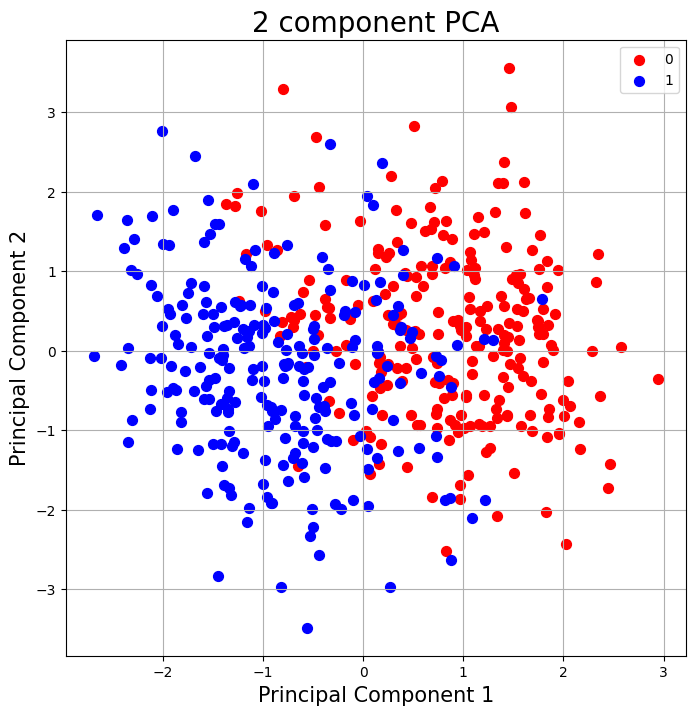

In [477]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1',fontsize = 15)
ax.set_ylabel('Principal Component 2',fontsize = 15)
ax.set_title('2 component PCA',fontsize = 20)

targets = [0,1]
colors = ['r','b']
for target, color in zip(targets,colors):
    indicesToKeep = final_df['target'] == target
    ax.scatter(final_df.loc[indicesToKeep, 'principal component 1']
               ,final_df.loc[indicesToKeep, 'principal component 2']
               ,c = color
               ,s = 50)
ax.legend(targets)
ax.grid()

### biplot

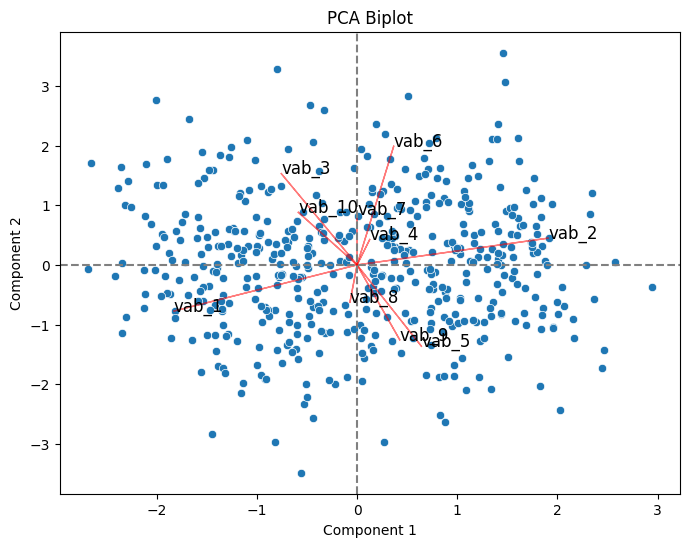

In [478]:
scores = pca.transform(X_values)
plt.figure(figsize=(8, 6))
sns.scatterplot(x=scores[:, 0], y=scores[:, 1])
for i, col in enumerate(df_moons.iloc[:,:-1].columns):
    plt.arrow(0, 0, eigenvectors[0, i] * max(scores[:, 0]), eigenvectors[1, i] * max(scores[:, 1]), color='r', alpha=0.5)
    plt.text(eigenvectors[0, i] * max(scores[:, 0]), eigenvectors[1, i] * max(scores[:, 1]), col, fontsize=12)
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.title('PCA Biplot')
plt.axhline(0, color='gray', linestyle='--')
plt.axvline(0, color='gray', linestyle='--')
plt.show()

### loading plot

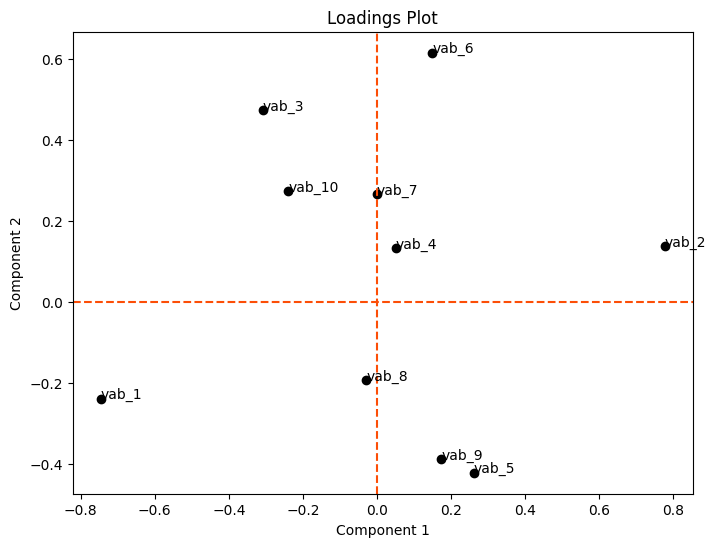

In [479]:
loadings = pca.components_.T * np.sqrt(pca.explained_variance_)
plt.figure(figsize=(8, 6))
plt.scatter(loadings[:, 0], loadings[:, 1], color='black')
for i, txt in enumerate(df_moons.iloc[:,:-1].columns):
    plt.text(loadings[i, 0], loadings[i, 1], txt, fontsize=10)
plt.axhline(0, color='#FC4E07', linestyle='--')
plt.axvline(0, color='#FC4E07', linestyle='--')
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.title('Loadings Plot')
plt.show()

### scores

In [480]:
scores_pca = pca.transform(X_values)

In [481]:
pd.DataFrame(scores_pca).head()

0         1
0 -0.356732  0.033128
1  1.372658  0.686870
2 -0.776566 -0.196056
3  1.084280 -0.292211
4  1.953384 -1.040168

## t-SNE

In [482]:
tsne = TSNE(n_components=2, random_state=42)

In [483]:
X_tsne = tsne.fit_transform(X_values)

In [484]:
tsne_data = np.vstack((X_tsne.T,df_moons['target'])).T

In [485]:
tsne_df = pd.DataFrame(data=tsne_data,columns=('dim_1','dim_2','target'))

In [486]:
tsne_df

dim_1      dim_2  target
0   -14.569781  -2.296545     1.0
1   -17.753819  -7.087676     0.0
2    -3.336135  -9.475118     1.0
3    -9.230266   8.833479     0.0
4     1.799288  13.531849     0.0
..         ...        ...     ...
495  -0.954640  11.136948     0.0
496 -11.215138  -5.061650     1.0
497   0.198493   7.038144     1.0
498  13.856954  -9.079967     1.0
499   1.990657  12.651636     0.0

[500 rows x 3 columns]

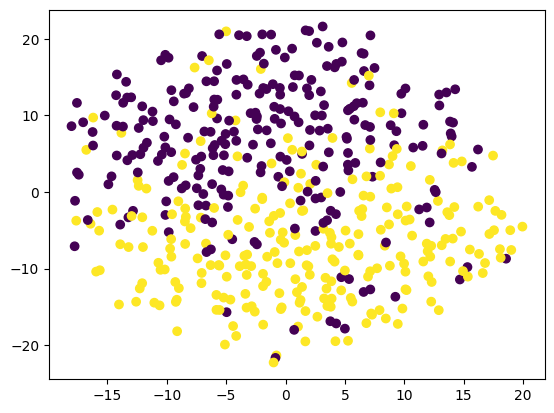

In [487]:
plt.scatter(x=tsne_df['dim_1'],y=tsne_df['dim_2'],c=tsne_df['target'])
plt.show()

In [488]:
tsne.kl_divergence_

1.6339346170425415

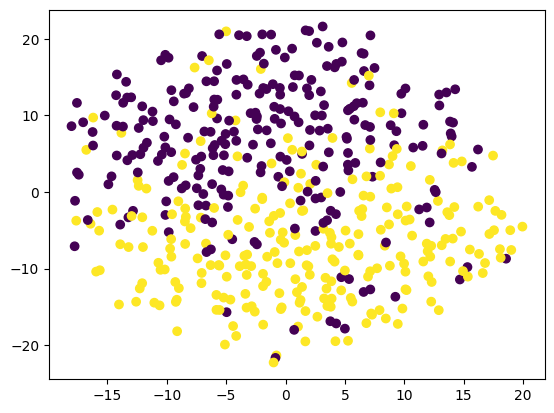

In [489]:
plt.scatter(x=X_tsne[:, 0],y=X_tsne[:, 1],c=y)

## clustering 

In [490]:
from sklearn.cluster import KMeans

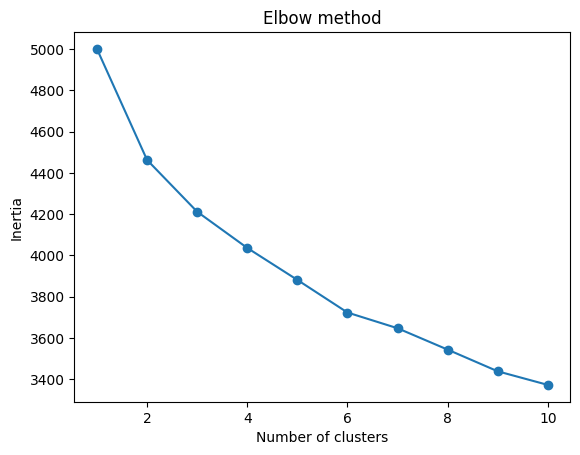

In [491]:
inertias = []

for i in range(1,11):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(X_values)
    inertias.append(kmeans.inertia_)

plt.plot(range(1,11), inertias, marker='o')
plt.title('Elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

In [492]:
kmeans = KMeans(n_clusters=2)

In [493]:
kmeans.fit(X_values)

KMeans(n_clusters=2)

In [494]:
df_moons['k_means'] = kmeans.labels_

In [495]:
df_moons

vab_1     vab_2     vab_3     vab_4     vab_5     vab_6     vab_7  \
0    0.831039 -0.258749 -0.037286 -0.063415  0.223983  0.097673  0.682748   
1    1.185064  0.920387 -0.260786 -0.003260  0.041206  0.875452 -0.055244   
2    1.164022 -0.455526 -0.027587  0.004808  0.238380  0.292087 -0.151071   
3   -0.023656  1.086288  0.092968 -0.382076 -0.124388 -0.298552  0.164905   
4    0.480503  1.509424 -0.037466  0.004709  0.065598 -0.133896 -0.060192   
..        ...       ...       ...       ...       ...       ...       ...   
495  0.282035  1.048354  0.227695  0.134424  0.459714  0.126161  0.554433   
496  0.274530 -0.142661  0.004286  0.273283  0.483893  0.218771 -0.024952   
497  0.182398  0.029661  0.204490  0.004233  0.181654  0.019322  0.171284   
498  1.260173 -0.589217  0.366165  0.604066  0.073230  0.082173 -0.456952   
499 -0.026649  1.583960 -0.183300  0.238902 -0.000487 -0.053150  0.074668   

        vab_8     vab_9    vab_10  target  k_means  
0   -0.255667  0.155431 -0.158760       1        0  
1   -0.339054  0.081903 -0.622392       0        1  
2   -0.045184 -0.229836 -0.338419       1        0  
3    0.540429 -0.390476 -0.555906       0        1  
4    0.110253  0.312129 -0.586515       0        1  
..        ...       ...       ...     ...      ...  
495  0.162005  0.318650 -0.097054       0        1  
496  0.413201 -0.657594 -0.426670       1        1  
497 -0.244321  0.171146  0.298324       1        0  
498 -0.159423 -0.057925  0.315096       1        0  
499 -0.117347 -0.128711 -0.511436       0        1  

[500 rows x 12 columns]

In [496]:
from scipy.optimize import linear_sum_assignment

y_true = df_moons['target'].values  
y_kmeans = df_moons['k_means'].values  

conf_matrix = confusion_matrix(y_true, y_kmeans)

row_ind, col_ind = linear_sum_assignment(-conf_matrix)  

mapping = {old: new for old, new in zip(col_ind, row_ind)}
df_moons['k_means'] = np.array([mapping[label] for label in y_kmeans])

print("accuracy before:", np.mean(y_kmeans == y_true))
print("accuracy after:", np.mean(df_moons['k_means'] == y_true))

accuracy before: 0.168
accuracy after: 0.832


In [497]:
df_moons

vab_1     vab_2     vab_3     vab_4     vab_5     vab_6     vab_7  \
0    0.831039 -0.258749 -0.037286 -0.063415  0.223983  0.097673  0.682748   
1    1.185064  0.920387 -0.260786 -0.003260  0.041206  0.875452 -0.055244   
2    1.164022 -0.455526 -0.027587  0.004808  0.238380  0.292087 -0.151071   
3   -0.023656  1.086288  0.092968 -0.382076 -0.124388 -0.298552  0.164905   
4    0.480503  1.509424 -0.037466  0.004709  0.065598 -0.133896 -0.060192   
..        ...       ...       ...       ...       ...       ...       ...   
495  0.282035  1.048354  0.227695  0.134424  0.459714  0.126161  0.554433   
496  0.274530 -0.142661  0.004286  0.273283  0.483893  0.218771 -0.024952   
497  0.182398  0.029661  0.204490  0.004233  0.181654  0.019322  0.171284   
498  1.260173 -0.589217  0.366165  0.604066  0.073230  0.082173 -0.456952   
499 -0.026649  1.583960 -0.183300  0.238902 -0.000487 -0.053150  0.074668   

        vab_8     vab_9    vab_10  target  k_means  
0   -0.255667  0.155431 -0.158760       1        1  
1   -0.339054  0.081903 -0.622392       0        0  
2   -0.045184 -0.229836 -0.338419       1        1  
3    0.540429 -0.390476 -0.555906       0        0  
4    0.110253  0.312129 -0.586515       0        0  
..        ...       ...       ...     ...      ...  
495  0.162005  0.318650 -0.097054       0        0  
496  0.413201 -0.657594 -0.426670       1        0  
497 -0.244321  0.171146  0.298324       1        1  
498 -0.159423 -0.057925  0.315096       1        1  
499 -0.117347 -0.128711 -0.511436       0        0  

[500 rows x 12 columns]

In [498]:
print(np.unique(df_moons['target']))

[0 1]


In [499]:
print(np.unique(kmeans.labels_))

[0 1]


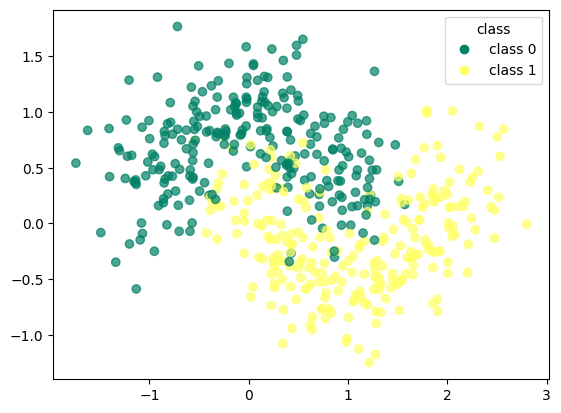

In [500]:
from matplotlib.lines import Line2D

scatter = plt.scatter(df_moons.iloc[:, 0], df_moons.iloc[:, 1], 
                      c=df_moons['target'], cmap='summer', alpha=0.7)

unique_labels = np.unique(df_moons['target'])
legend_elements = [Line2D([0], [0], marker='o', color='w', label=f'class {label}',
                          markerfacecolor=scatter.cmap(scatter.norm(label)), markersize=8) 
                        for label in unique_labels]
plt.legend(handles=legend_elements, title="class")
plt.show()

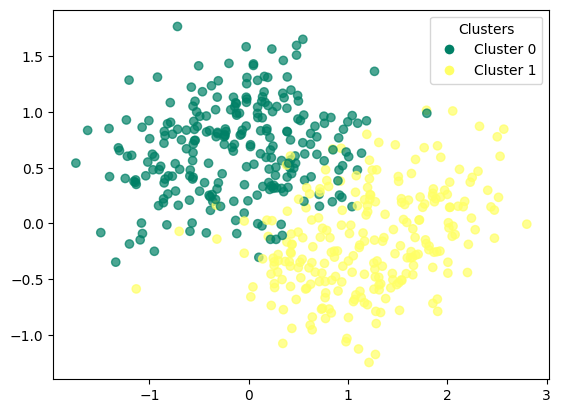

In [501]:
scatter = plt.scatter(df_moons.iloc[:, 0], df_moons.iloc[:, 1], 
                      c=df_moons['k_means'], cmap='summer', alpha=0.7)

unique_clusters = np.unique(df_moons['k_means'])
legend_elements = [Line2D([0], [0], marker='o', color='w', label=f'Cluster {cluster}',
                          markerfacecolor=scatter.cmap(scatter.norm(cluster)), markersize=8) 
                   for cluster in unique_clusters]
plt.legend(handles=legend_elements, title="Clusters")
plt.show()

In [502]:
kmeans.cluster_centers_

array([[ 0.71127869, -0.69942467,  0.11326304,  0.03280388, -0.18914278,
        -0.1369359 ,  0.0792028 ,  0.0016772 , -0.08099949,  0.12537279],
       [-0.69998855,  0.68832269, -0.11146521, -0.03228319,  0.18614051,
         0.13476231, -0.07794562, -0.00165058,  0.07971378, -0.12338274]])

In [503]:
print(confusion_matrix(df_moons['target'],df_moons['k_means']))

[[209  41]
 [ 43 207]]


In [504]:
print(classification_report(df_moons['target'],df_moons['k_means']))

              precision    recall  f1-score   support

           0       0.83      0.84      0.83       250
           1       0.83      0.83      0.83       250

    accuracy                           0.83       500
   macro avg       0.83      0.83      0.83       500
weighted avg       0.83      0.83      0.83       500



### clustering with pca

In [505]:
WCSS = []

for i in range(1,30):
  kmeans_pca = KMeans(n_clusters = i, init = "k-means++", random_state = 42)
  kmeans_pca.fit(scores_pca)
  WCSS.append(kmeans_pca.inertia_)

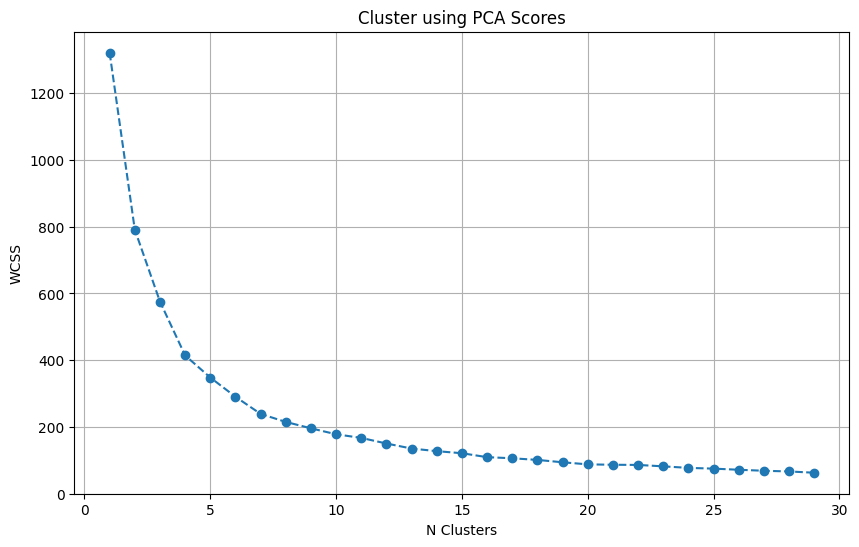

In [506]:
plt.figure(figsize = (10,6))
plt.plot(range(1,30), WCSS, marker = "o", linestyle = "--")
plt.grid()
plt.title("Cluster using PCA Scores")
plt.ylabel("WCSS")
plt.xlabel("N Clusters")
plt.show()

In [507]:
kmeans_pca = KMeans(n_clusters=2,init='k-means++')

In [508]:
kmeans_pca.fit(scores_pca)

KMeans(n_clusters=2)

In [509]:
df_pca_kmeans = df_moons.copy()

In [510]:
df_pca_kmeans["kmeans_pca"] = kmeans_pca.labels_

In [511]:
df_pca_kmeans

vab_1     vab_2     vab_3     vab_4     vab_5     vab_6     vab_7  \
0    0.831039 -0.258749 -0.037286 -0.063415  0.223983  0.097673  0.682748   
1    1.185064  0.920387 -0.260786 -0.003260  0.041206  0.875452 -0.055244   
2    1.164022 -0.455526 -0.027587  0.004808  0.238380  0.292087 -0.151071   
3   -0.023656  1.086288  0.092968 -0.382076 -0.124388 -0.298552  0.164905   
4    0.480503  1.509424 -0.037466  0.004709  0.065598 -0.133896 -0.060192   
..        ...       ...       ...       ...       ...       ...       ...   
495  0.282035  1.048354  0.227695  0.134424  0.459714  0.126161  0.554433   
496  0.274530 -0.142661  0.004286  0.273283  0.483893  0.218771 -0.024952   
497  0.182398  0.029661  0.204490  0.004233  0.181654  0.019322  0.171284   
498  1.260173 -0.589217  0.366165  0.604066  0.073230  0.082173 -0.456952   
499 -0.026649  1.583960 -0.183300  0.238902 -0.000487 -0.053150  0.074668   

        vab_8     vab_9    vab_10  target  k_means  kmeans_pca  
0   -0.255667  0.155431 -0.158760       1        1           0  
1   -0.339054  0.081903 -0.622392       0        0           1  
2   -0.045184 -0.229836 -0.338419       1        1           0  
3    0.540429 -0.390476 -0.555906       0        0           1  
4    0.110253  0.312129 -0.586515       0        0           1  
..        ...       ...       ...     ...      ...         ...  
495  0.162005  0.318650 -0.097054       0        0           1  
496  0.413201 -0.657594 -0.426670       1        0           1  
497 -0.244321  0.171146  0.298324       1        1           0  
498 -0.159423 -0.057925  0.315096       1        1           0  
499 -0.117347 -0.128711 -0.511436       0        0           1  

[500 rows x 13 columns]

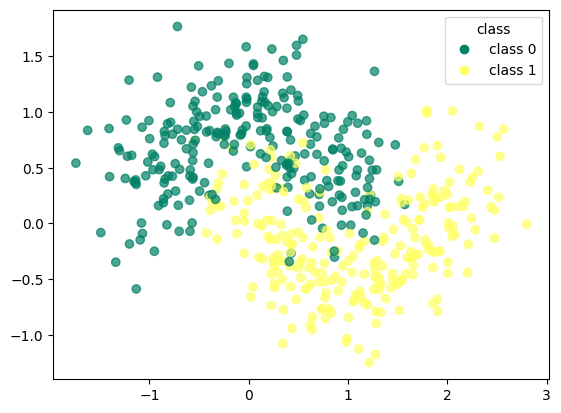

In [512]:
from matplotlib.lines import Line2D

scatter = plt.scatter(df_pca_kmeans.iloc[:, 0], df_pca_kmeans.iloc[:, 1], 
                      c=df_pca_kmeans['target'], cmap='summer', alpha=0.7)

unique_labels = np.unique(df_pca_kmeans['target'])
legend_elements = [Line2D([0], [0], marker='o', color='w', label=f'class {label}',
                          markerfacecolor=scatter.cmap(scatter.norm(label)), markersize=8) 
                   for label in unique_labels]
plt.legend(handles=legend_elements, title="class")
plt.show()

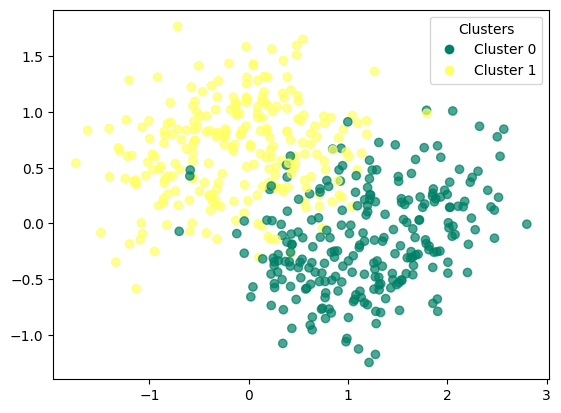

In [513]:
scatter = plt.scatter(df_pca_kmeans.iloc[:, 0], df_pca_kmeans.iloc[:, 1], 
                      c=df_pca_kmeans['kmeans_pca'], cmap='summer', alpha=0.7)
unique_clusters = np.unique(df_pca_kmeans['kmeans_pca'])
legend_elements = [Line2D([0], [0], marker='o', color='w', label=f'Cluster {cluster}',
                          markerfacecolor=scatter.cmap(scatter.norm(cluster)), markersize=8) 
                   for cluster in unique_clusters]
plt.legend(handles=legend_elements, title="Clusters")
plt.show()

In [514]:
y_true = df_pca_kmeans['target'].values  
y_kmeans = df_pca_kmeans['kmeans_pca'].values  

conf_matrix = confusion_matrix(y_true, y_kmeans)

row_ind, col_ind = linear_sum_assignment(-conf_matrix)  

mapping = {old: new for old, new in zip(col_ind, row_ind)}
df_pca_kmeans['kmeans_pca'] = np.array([mapping[label] for label in y_kmeans])

print("accuracy before:", np.mean(y_kmeans == y_true))
print("accuracy after:", np.mean(df_pca_kmeans['kmeans_pca'] == y_true))

accuracy before: 0.174
accuracy after: 0.826


In [515]:
df_pca_kmeans

vab_1     vab_2     vab_3     vab_4     vab_5     vab_6     vab_7  \
0    0.831039 -0.258749 -0.037286 -0.063415  0.223983  0.097673  0.682748   
1    1.185064  0.920387 -0.260786 -0.003260  0.041206  0.875452 -0.055244   
2    1.164022 -0.455526 -0.027587  0.004808  0.238380  0.292087 -0.151071   
3   -0.023656  1.086288  0.092968 -0.382076 -0.124388 -0.298552  0.164905   
4    0.480503  1.509424 -0.037466  0.004709  0.065598 -0.133896 -0.060192   
..        ...       ...       ...       ...       ...       ...       ...   
495  0.282035  1.048354  0.227695  0.134424  0.459714  0.126161  0.554433   
496  0.274530 -0.142661  0.004286  0.273283  0.483893  0.218771 -0.024952   
497  0.182398  0.029661  0.204490  0.004233  0.181654  0.019322  0.171284   
498  1.260173 -0.589217  0.366165  0.604066  0.073230  0.082173 -0.456952   
499 -0.026649  1.583960 -0.183300  0.238902 -0.000487 -0.053150  0.074668   

        vab_8     vab_9    vab_10  target  k_means  kmeans_pca  
0   -0.255667  0.155431 -0.158760       1        1           1  
1   -0.339054  0.081903 -0.622392       0        0           0  
2   -0.045184 -0.229836 -0.338419       1        1           1  
3    0.540429 -0.390476 -0.555906       0        0           0  
4    0.110253  0.312129 -0.586515       0        0           0  
..        ...       ...       ...     ...      ...         ...  
495  0.162005  0.318650 -0.097054       0        0           0  
496  0.413201 -0.657594 -0.426670       1        0           0  
497 -0.244321  0.171146  0.298324       1        1           1  
498 -0.159423 -0.057925  0.315096       1        1           1  
499 -0.117347 -0.128711 -0.511436       0        0           0  

[500 rows x 13 columns]

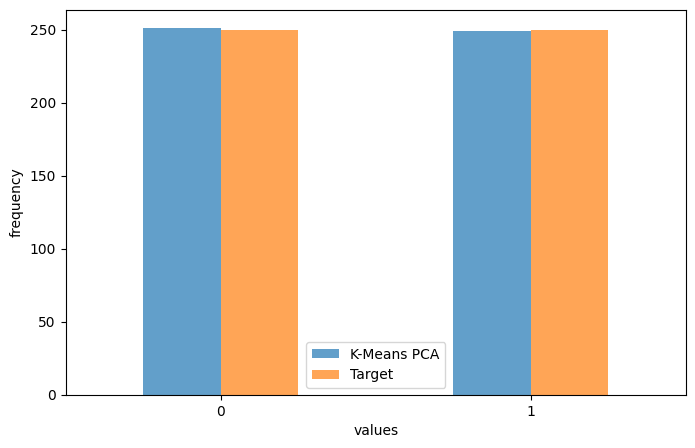

In [516]:
counts_kmeans = df_pca_kmeans['kmeans_pca'].value_counts().sort_index()
counts_target = df_pca_kmeans['target'].value_counts().sort_index()

df_counts = pd.DataFrame({'K-Means PCA': counts_kmeans, 'Target': counts_target}).fillna(0)

df_counts.plot(kind='bar', figsize=(8, 5), alpha=0.7)
plt.xlabel("values")
plt.ylabel("frequency")
plt.legend(["K-Means PCA", "Target"])
plt.xticks(rotation=0)  
plt.show()


In [517]:
print(confusion_matrix(df_pca_kmeans['target'],df_pca_kmeans['kmeans_pca']))

[[207  43]
 [ 44 206]]


In [518]:
print(classification_report(df_pca_kmeans['target'],df_pca_kmeans['kmeans_pca']))

              precision    recall  f1-score   support

           0       0.82      0.83      0.83       250
           1       0.83      0.82      0.83       250

    accuracy                           0.83       500
   macro avg       0.83      0.83      0.83       500
weighted avg       0.83      0.83      0.83       500



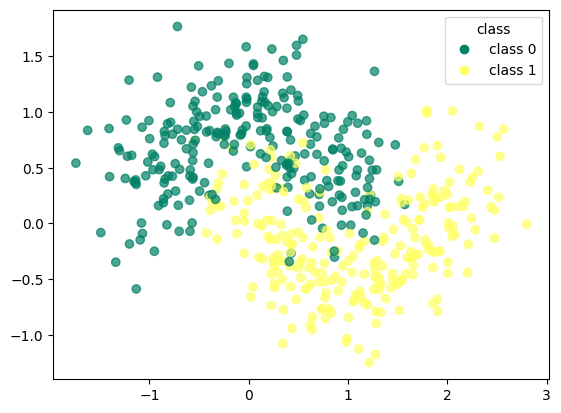

In [519]:
from matplotlib.lines import Line2D

scatter = plt.scatter(df_pca_kmeans.iloc[:, 0], df_pca_kmeans.iloc[:, 1], 
                      c=df_pca_kmeans['target'], cmap='summer', alpha=0.7)

unique_labels = np.unique(df_pca_kmeans['target'])
legend_elements = [Line2D([0], [0], marker='o', color='w', label=f'class {label}',
                          markerfacecolor=scatter.cmap(scatter.norm(label)), markersize=8) 
                   for label in unique_labels]
plt.legend(handles=legend_elements, title="class")
plt.show()

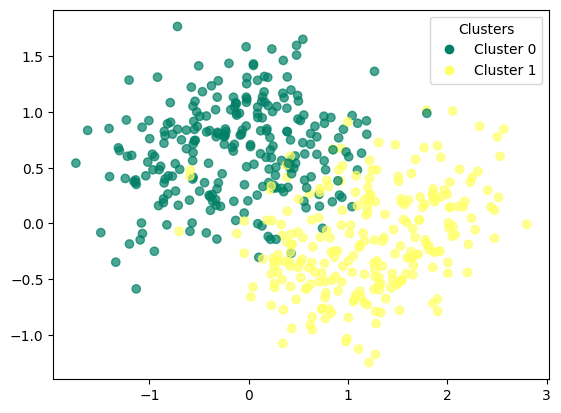

In [520]:
scatter = plt.scatter(df_pca_kmeans.iloc[:, 0], df_pca_kmeans.iloc[:, 1], 
                      c=df_pca_kmeans['kmeans_pca'], cmap='summer', alpha=0.7)
unique_clusters = np.unique(df_pca_kmeans['kmeans_pca'])
legend_elements = [Line2D([0], [0], marker='o', color='w', label=f'Cluster {cluster}',
                          markerfacecolor=scatter.cmap(scatter.norm(cluster)), markersize=8) 
                   for cluster in unique_clusters]
plt.legend(handles=legend_elements, title="Clusters")
plt.show()

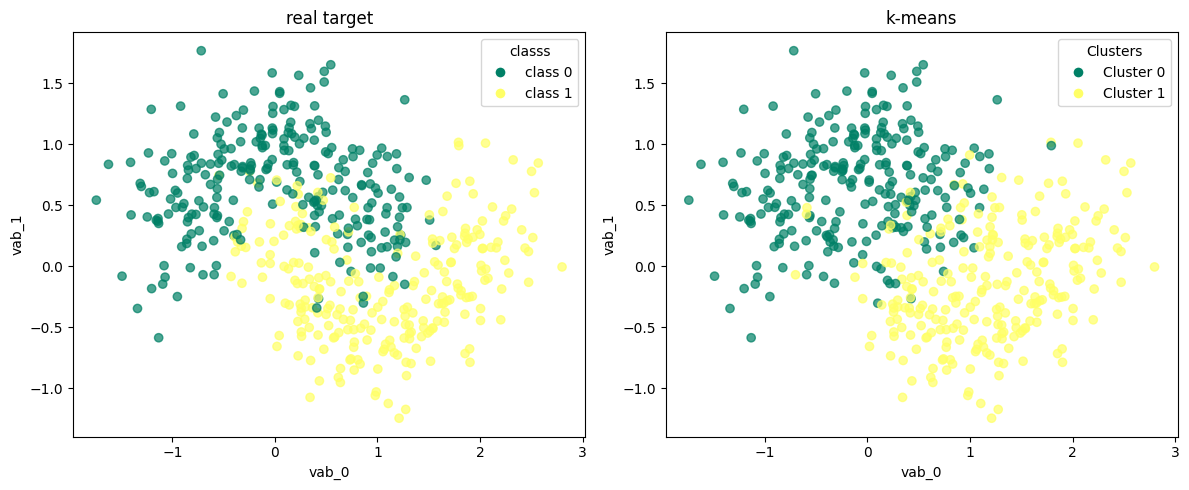

In [521]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))  

scatter1 = axes[0].scatter(df_pca_kmeans.iloc[:, 0], df_pca_kmeans.iloc[:, 1], 
                           c=df_pca_kmeans['target'], cmap='summer', alpha=0.7)

unique_labels = np.unique(df_pca_kmeans['target'])
legend_elements1 = [Line2D([0], [0], marker='o', color='w', label=f'class {label}',
                           markerfacecolor=scatter1.cmap(scatter1.norm(label)), markersize=8) 
                    for label in unique_labels]
axes[0].legend(handles=legend_elements1, title="classs")
axes[0].set_title("real target")

scatter2 = axes[1].scatter(df_pca_kmeans.iloc[:, 0], df_pca_kmeans.iloc[:, 1], 
                           c=df_pca_kmeans['kmeans_pca'], cmap='summer', alpha=0.7)

unique_clusters = np.unique(df_pca_kmeans['kmeans_pca'])
legend_elements2 = [Line2D([0], [0], marker='o', color='w', label=f'Cluster {cluster}',
                           markerfacecolor=scatter2.cmap(scatter2.norm(cluster)), markersize=8) 
                    for cluster in unique_clusters]
axes[1].legend(handles=legend_elements2, title="Clusters")
axes[1].set_title("k-means")

for ax in axes:
    ax.set_xlabel("vab_0")
    ax.set_ylabel("vab_1")

plt.tight_layout()  
plt.show()

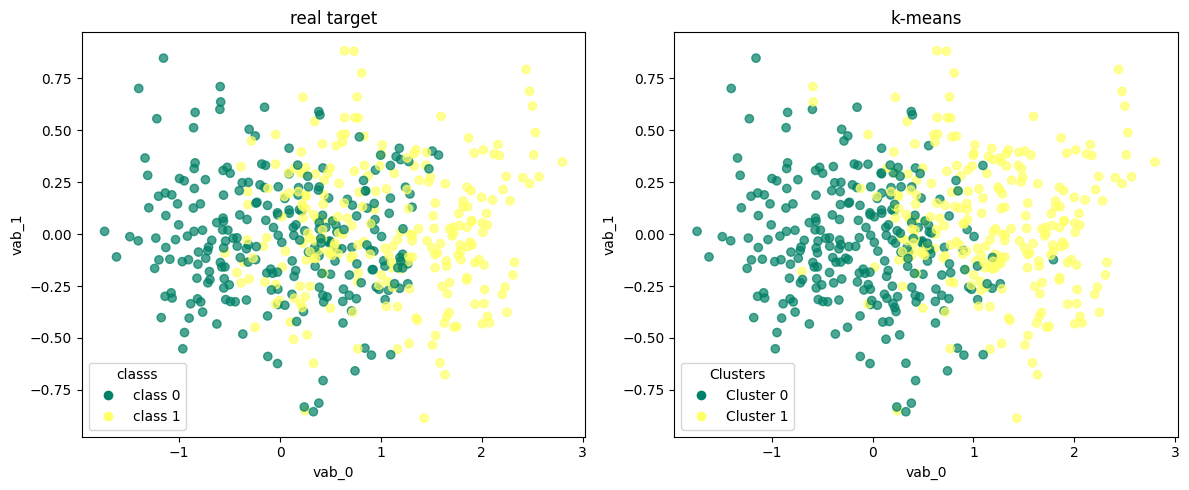

In [522]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))  

scatter1 = axes[0].scatter(df_pca_kmeans.iloc[:, 0], df_pca_kmeans.iloc[:, 2], 
                           c=df_pca_kmeans['target'], cmap='summer', alpha=0.7)

unique_labels = np.unique(df_pca_kmeans['target'])
legend_elements1 = [Line2D([0], [0], marker='o', color='w', label=f'class {label}',
                           markerfacecolor=scatter1.cmap(scatter1.norm(label)), markersize=8) 
                    for label in unique_labels]
axes[0].legend(handles=legend_elements1, title="classs")
axes[0].set_title("real target")

scatter2 = axes[1].scatter(df_pca_kmeans.iloc[:, 0], df_pca_kmeans.iloc[:, 2], 
                           c=df_pca_kmeans['kmeans_pca'], cmap='summer', alpha=0.7)

unique_clusters = np.unique(df_pca_kmeans['kmeans_pca'])
legend_elements2 = [Line2D([0], [0], marker='o', color='w', label=f'Cluster {cluster}',
                           markerfacecolor=scatter2.cmap(scatter2.norm(cluster)), markersize=8) 
                    for cluster in unique_clusters]
axes[1].legend(handles=legend_elements2, title="Clusters")
axes[1].set_title("k-means")

for ax in axes:
    ax.set_xlabel("vab_0")
    ax.set_ylabel("vab_1")

plt.tight_layout()  
plt.show()

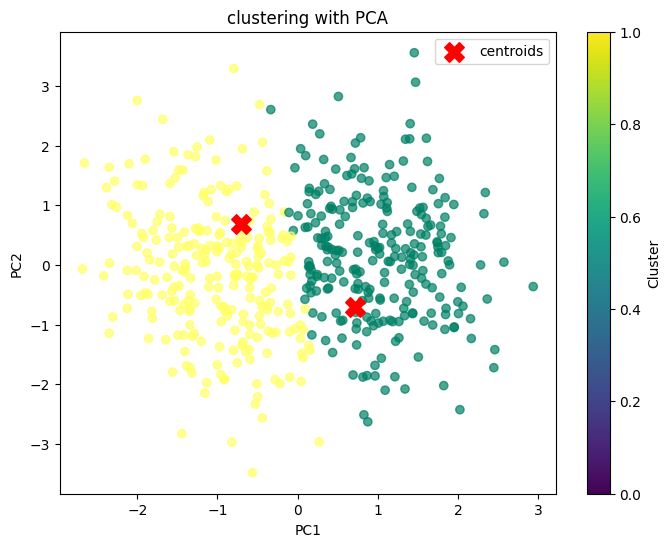

In [523]:
plt.figure(figsize=(8, 6))
plt.scatter(final_df['principal component 1'], final_df['principal component 2'] , c=df_pca_kmeans['kmeans_pca'], cmap='summer', alpha=0.7)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], 
            c='red', marker='X', s=200, label='centroids')

plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('clustering with PCA')
plt.colorbar(label='Cluster')
plt.legend()
plt.show()

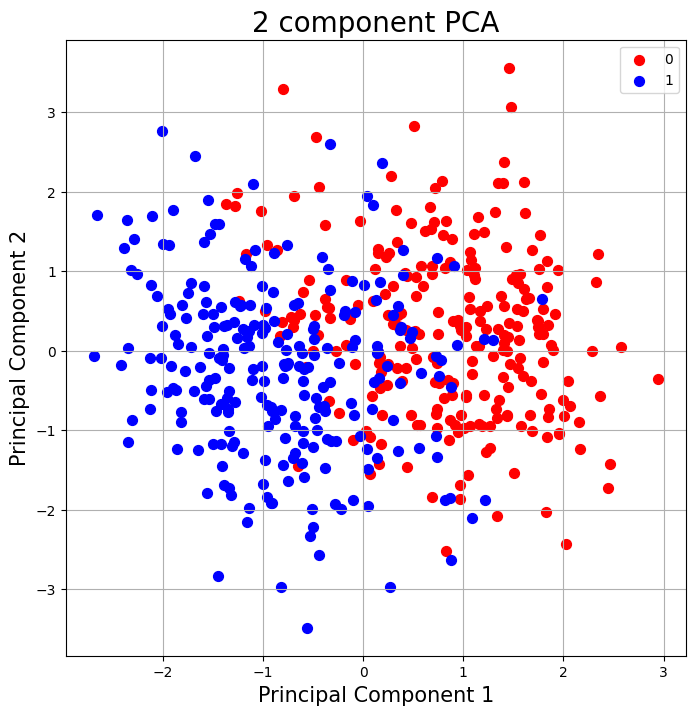

In [524]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1',fontsize = 15)
ax.set_ylabel('Principal Component 2',fontsize = 15)
ax.set_title('2 component PCA',fontsize = 20)

targets = [0,1]
colors = ['r','b']
for target, color in zip(targets,colors):
    indicesToKeep = final_df['target'] == target
    ax.scatter(final_df.loc[indicesToKeep, 'principal component 1']
               ,final_df.loc[indicesToKeep, 'principal component 2']
               ,c = color
               ,s = 50)
ax.legend(targets)
ax.grid()

# non linear dataset - circles

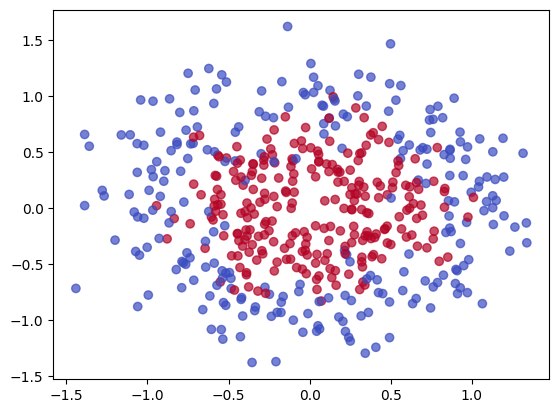

In [525]:
X, y = make_circles(n_samples=500, noise=0.2, factor=0.5, random_state=42)

num_extra_features = 10
extra_features = np.random.normal(scale=0.5, size=(X.shape[0], num_extra_features))
X_extended = np.hstack((X, extra_features))

df3 = pd.DataFrame(X_extended, columns=[f"Feature_{i+1}" for i in range(X_extended.shape[1])])
df3["Target"] = y

plt.scatter(X[:, 0], X[:, 1], c=y, cmap='coolwarm', alpha=0.7)
plt.show()

In [526]:
df3

Feature_1  Feature_2  Feature_3  Feature_4  Feature_5  Feature_6  \
0    -0.469004   0.323509  -0.231368  -0.153524   0.571783   0.053247   
1     0.125867   1.048157   0.010061   0.445850  -0.336197   0.168250   
2    -0.386288   0.042201   0.064999  -0.531518   0.210624   0.423420   
3    -0.494481  -0.578267   0.110095   0.516195   0.961757  -0.476520   
4    -0.714102   0.865415  -0.231927  -0.549093  -0.224454  -0.203055   
..         ...        ...        ...        ...        ...        ...   
495  -0.854312   0.509894  -0.185349   0.306206   0.275406  -0.100973   
496   0.600061  -0.021119   0.497001   0.032924  -0.232462  -0.090327   
497  -0.715531   0.630037   0.243657   0.396370   1.171429   0.072383   
498  -0.318829  -0.743461   0.508533   0.062779  -0.349237  -0.040640   
499  -1.042015   0.962384   0.189805  -0.418094  -0.090703   0.473910   

     Feature_7  Feature_8  Feature_9  Feature_10  Feature_11  Feature_12  \
0    -0.421649   0.351015   0.098838   -1.260802    0.214176    0.195914   
1    -0.783480   0.203545   0.976530   -0.497428   -0.379901   -0.355008   
2     0.267174  -0.884208   0.497584    0.468684    0.415081    0.186421   
3     0.539063  -0.043109  -0.064837   -0.768265   -0.142395   -0.498632   
4     0.048377  -0.807375  -0.722759    0.180957   -0.398719    0.537265   
..         ...        ...        ...         ...         ...         ...   
495  -0.625013   0.152851   0.275718    0.362911    0.174646   -0.135558   
496  -0.872985  -0.091121   0.344218    0.169892    0.760332   -0.131487   
497  -0.522094   0.423964   0.932864   -0.161274    0.420541    0.614364   
498   0.229300   0.454111   0.166973   -0.189954    0.277690    0.430043   
499  -0.691509  -1.046589   0.754041    0.255708    0.303365   -0.538408   

     Target  
0         1  
1         0  
2         1  
3         0  
4         0  
..      ...  
495       0  
496       1  
497       1  
498       1  
499       0  

[500 rows x 13 columns]